In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [81]:
pd.set_option("display.max_columns", None) # bütün sütunları gösterir

#pd.set_option("display.max_rows", None)       # Tüm satırları gösterir
#pd.set_option("display.max_colwidth", None)   # Uzun stringleri tam gösterir
#pd.set_option("display.precision", 3)         # Ondalık hassasiyeti ayarlar
#pd.reset_option("display.max_columns") # Varsayılan ayarlara döner

In [82]:
# Veri setini yükleme
df = sns.load_dataset("titanic")

In [83]:
# Türkçe font ayarları
plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["axes.unicode_minus"] = False

<h2>Temel Grafik Oluşturma</h2>

* **Kategorik Değişkenler:** --> Sütun grafik ile ya da pasta grafik ile görselleştiririz. --> Seaborn: countplot, Matplotlib: bar
* **Sayısal Değişkenler:** --> histogram (hist), kutu (boxplot) grafik

In [84]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
df["age"].value_counts().count()

np.int64(88)

<h2>Matplotlib Temelleri</h2>

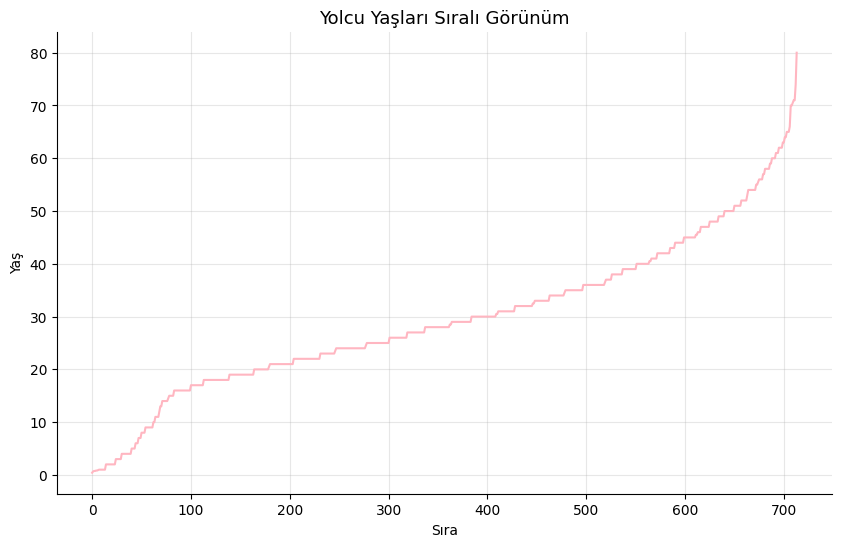

In [86]:
# Basit Çizgi Grafiği

plt.figure(figsize=(10,6))
ages = df["age"].dropna().sort_values()
plt.plot(ages.values)
#plt.plot(df["age"].values)
plt.title("Yolcu Yaşları Sıralı Görünüm")
plt.xlabel("Sıra")
plt.ylabel("Yaş")
plt.grid(True, alpha=0.3 ) #Izgara çizgileri eklenir. alpha değeri grid'lerin saydamlık değeri.
plt.show()

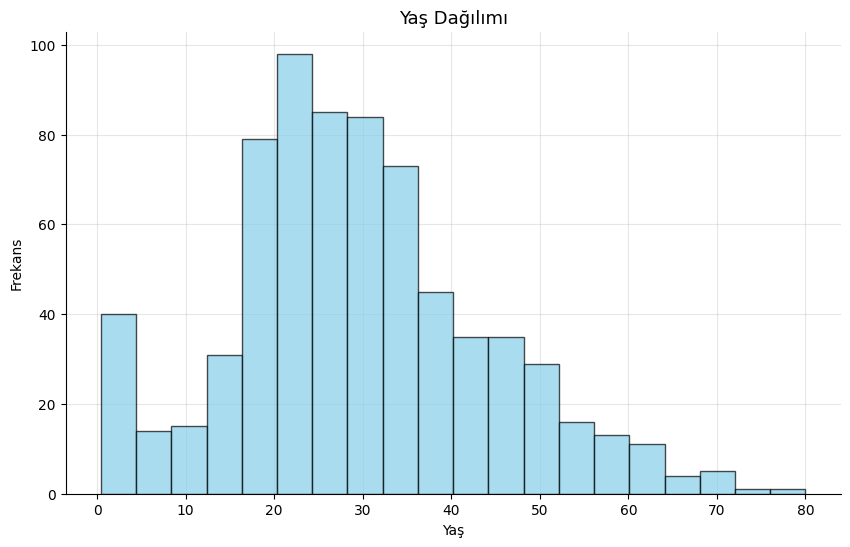

In [87]:
# Histogram

plt.figure(figsize=(10,6))
plt.hist(df["age"].dropna(), bins=20, color="skyblue", alpha=0.7, edgecolor="black")
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.grid(True, alpha=0.3)
plt.show()

<h2>Seaborn Temelleri</h2>

In [88]:
# Seaborn still ayarları

sns.set_style("whitegrid")
# arka planının beyaz zemin ve açık grid çizgileri ekler
# Sayısal veri içeren grafiklerde (çizgi grafik, çubuk grafik, vs) değerleri okumayı kolaylaştırır.

sns.set_palette("husl") # grafiklerdeki renk paletini ayarlama işlemi
# husl -> daha açık ve dengeleli renkler sağlar.
# Farklı kategoriler için parlak ve birbirinden ayırt edilebilir renkler üretir.
# Kategorik (sınıflandırılmış) verilerle çalışırken iyi görünür.

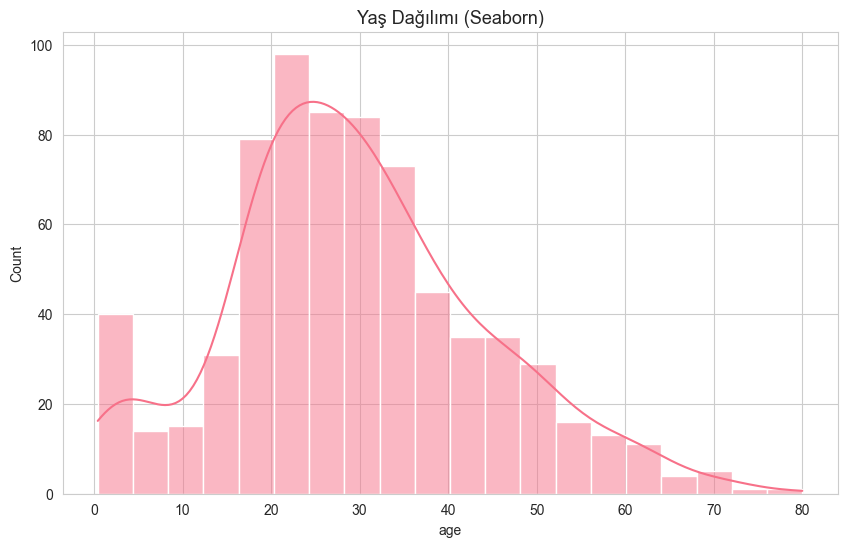

In [89]:
# Basit histogram (Seaborn)

plt.figure(figsize=(10,6))
sns.histplot(df, x="age" , bins=20, kde=True)
# bins = 20 --> yaş aralığını 20 eşit parçaya ayırır ve her birinin kaç kişi içerdiğini sayar.
# KDE = Kernel Density Estimation (Kernel Yoğunluk Tahmini) 
#   Histogramin üzerine bir eğri çizer ve bu verinin nasıl dağıldığını net görmemizi sağlar
#plt.xlabel("Yaş")
#plt.ylabel("Frekans")
plt.title("Yaş Dağılımı (Seaborn)")
plt.show()

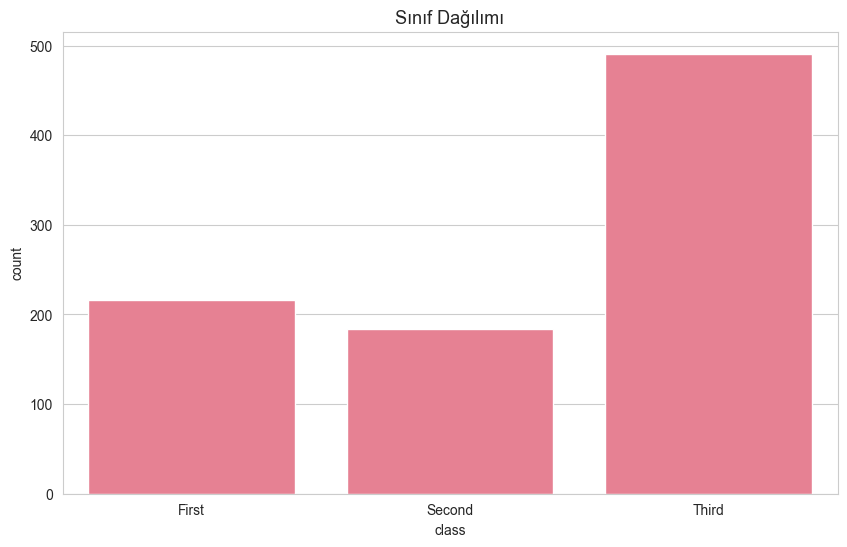

In [90]:
# Count Plot

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="class") #çubuk grafik - bar chart
# counplot, class sütunundaki kategorilerin frekanslarını çubuklarla gösterir.
#sns.countplot(data=df, x="class", hue="sex", palette="husl", order=["Third","First","Second"])
# hue = "sex" --> her class'ın içindeki kadın erkek frekansına bakar
plt.title("Sınıf Dağılımı")
plt.show()

<h2>Temel Grafik Türlleri</h2>

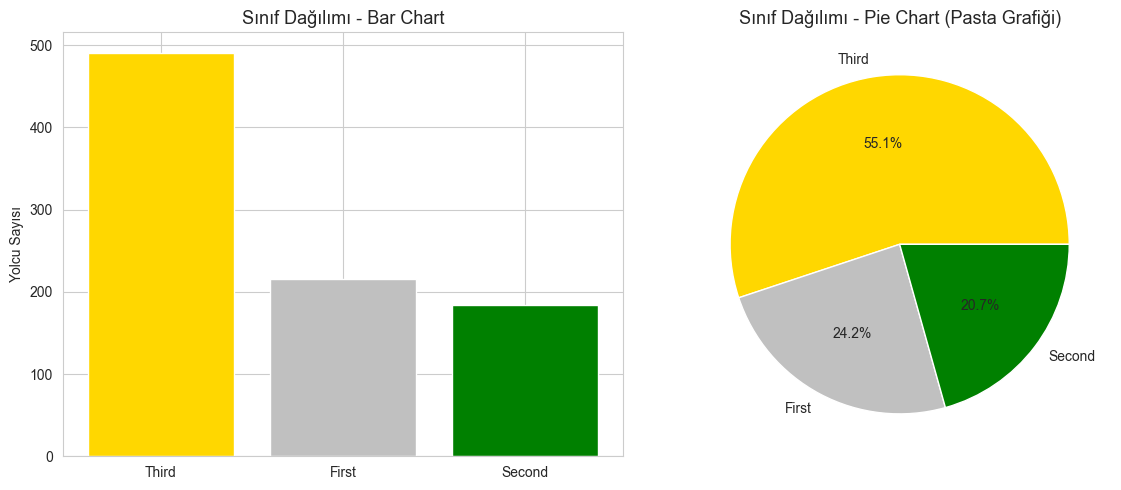

In [91]:
# Bar Chart - Pie Chart - Subplot (Alt Grafik)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sinif_frekans = df["class"].value_counts()
plt.bar(sinif_frekans.index, sinif_frekans.values, color=["gold","silver","green"])
plt.title("Sınıf Dağılımı - Bar Chart")
plt.ylabel("Yolcu Sayısı")

plt.subplot(1, 2, 2)
plt.pie(sinif_frekans.values, labels=sinif_frekans.index, autopct='%1.1f%%', colors=["gold","silver","green"])
# autopct = '%1.1f%%' --> Virgülden sonra 1 basamaklı ondaklı gösterim.
plt.title("Sınıf Dağılımı - Pie Chart (Pasta Grafiği)")
plt.tight_layout() #subplot'ların çakışmasını engellemek için kullanırız.

plt.show()

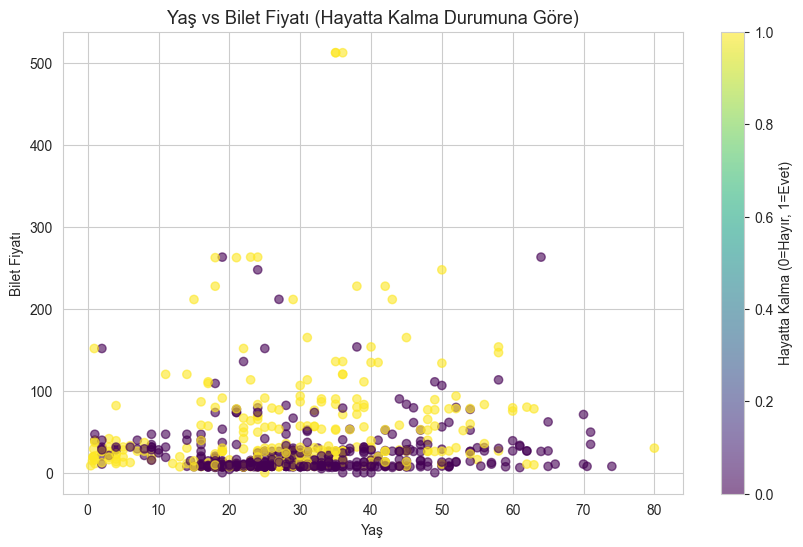

In [92]:
# Scatter Plot - Saçılım Grafiği

plt.figure(figsize=(10,6))
plt.scatter(df["age"], df["fare"], alpha=0.6, c =df["survived"], cmap="viridis")
# alpha --> noktaların ne kadar şeffaf olacağını belirleriz.
# c = df["survived"] --> Noktaların rengi, survived sütunundaki değere göre belirlenir.
# cmap = "viridis" --> renk haritasıdır. Koyu mordan sarıya doğru geçiş yapar.
plt.colorbar(label = "Hayatta Kalma (0=Hayır, 1=Evet)")
plt.xlabel("Yaş")
plt.ylabel("Bilet Fiyatı")
plt.title("Yaş vs Bilet Fiyatı (Hayatta Kalma Durumuna Göre)")
plt.show()

<h1>Gelişmiş Görselleştirmeler</h1>

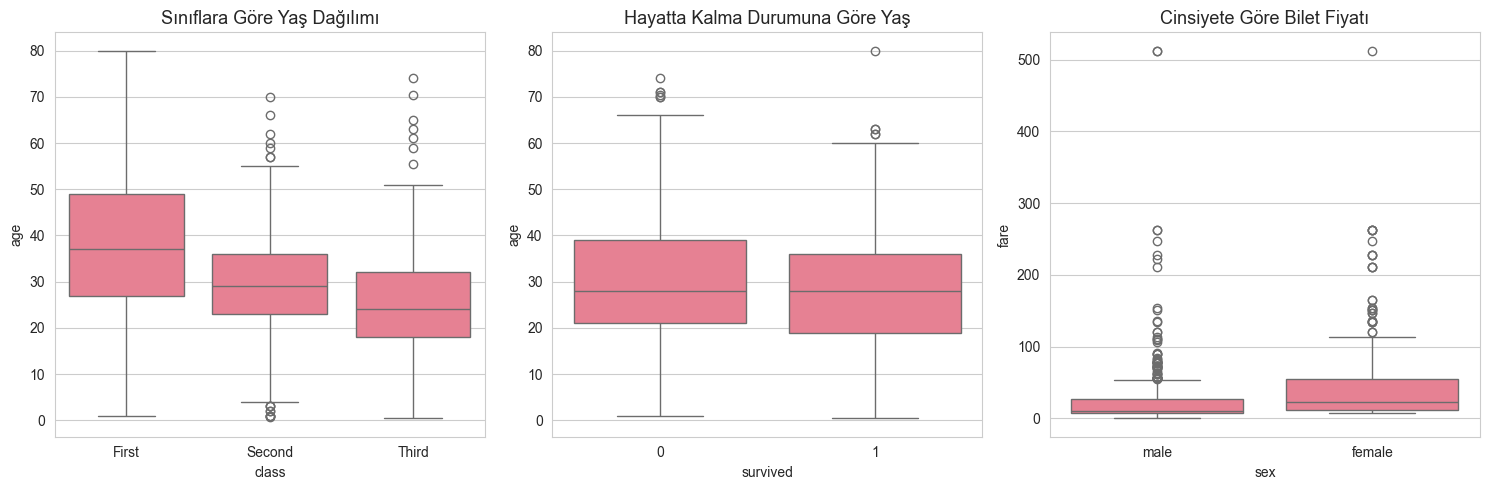

In [93]:
# Box Plot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=df, x="class", y="age")
plt.title("Sınıflara Göre Yaş Dağılımı")
# Third -->  max değerin üstünde outlier değerleri görüyoruz.
# Second --> max değerin üstünde ve min değerin altında outlier değerleri görüyoruz.

plt.subplot(1,3,2)
sns.boxplot(data=df, x="survived", y="age")
plt.title("Hayatta Kalma Durumuna Göre Yaş")

plt.subplot(1,3,3)
sns.boxplot(data=df, x="sex", y="fare")
plt.title("Cinsiyete Göre Bilet Fiyatı")

plt.tight_layout()
plt.show()

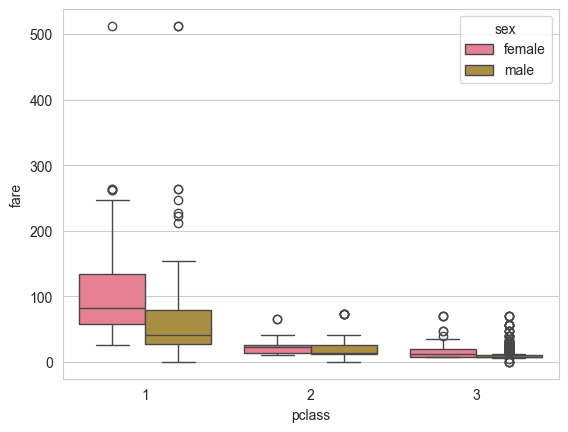

In [94]:
# Her departman, cinsiyet ve bilet fiyatı değişkenlerine göre farklı dağılımları.
sns.boxplot(data=df, x="pclass", y="fare", hue="sex")
plt.show()

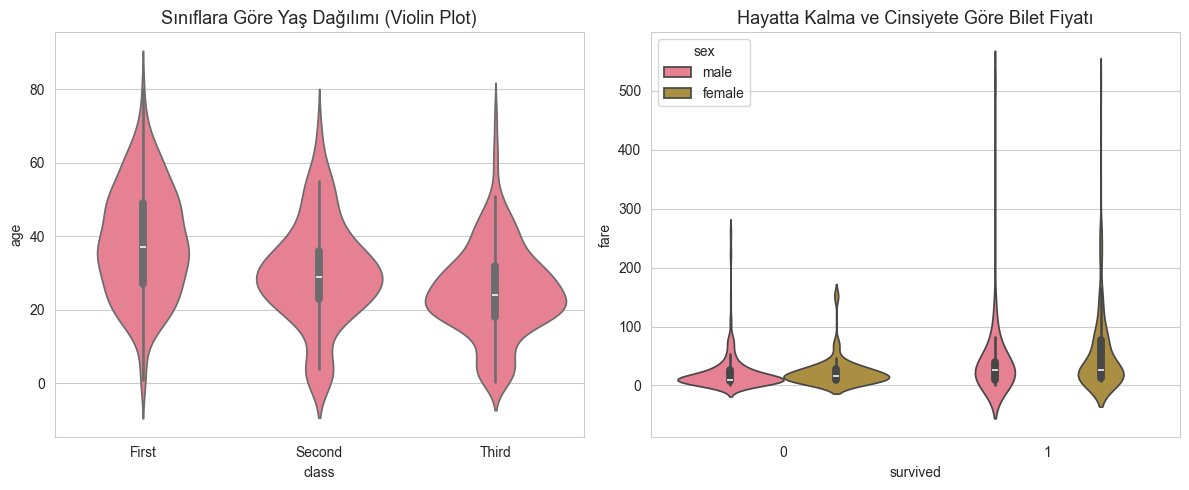

In [95]:
# Violin Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.violinplot(data=df, x="class", y="age")
plt.title("Sınıflara Göre Yaş Dağılımı (Violin Plot)")

plt.subplot(1,2,2)
sns.violinplot(data=df, x="survived", y="fare", hue="sex")
plt.title("Hayatta Kalma ve Cinsiyete Göre Bilet Fiyatı")

plt.tight_layout()
plt.show()

<h3>Çoklu Değişken Analizi</h3>

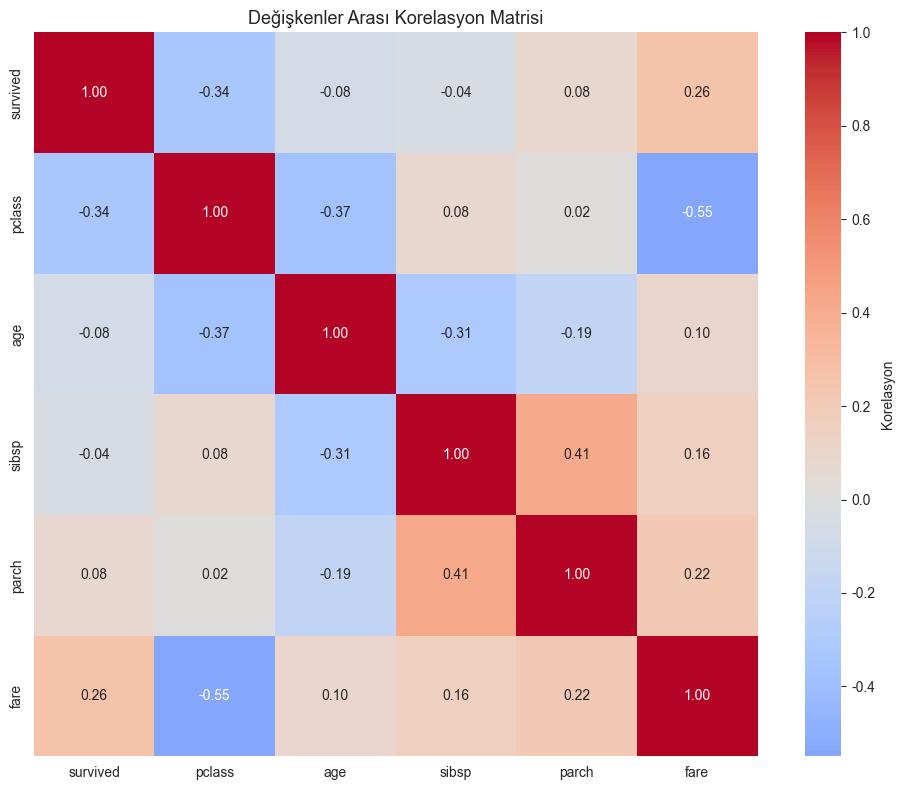

In [96]:
# Heatmap (Isı Haritası) - Korelasyon Matrisi
plt.figure(figsize=(10,8))
num_degerler = ["survived","pclass","age","sibsp","parch","fare"]
corr_matrix = df[num_degerler].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f", cbar_kws={"label":"Korelasyon"}) 
# annot = True --> Hücrelerin içine korelasyon değerlerini yazdırır.
# cmap = "coolwarm" --> düşük korelasyonları soğuk, yüksek korelasyonları sıcak renklerle gösterir.
# center = 0 --> Korelasyonun sıfır olduğu yerin nötr (gri) olarak görselleştirir.
# square = True --> Isı haritasının kare şeklinde olmasını sağlar.
# fmt = ".2f" --> Hücrelerdeki değeri 2 ondalıklı formatlar.
# cbar_kws --> Renk çubuğuna (en sağdaki) "Korelasyon" etikerini ekler.
plt.title("Değişkenler Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()

# 1: Mükemmel pozitif korelasyon (değişkenler birlikte artar)
# -1: Mükemmel negatif korelasyon (bir değişken artarken diğeri azalır)
# 0: Korelasyon yoktur. (değişkenler arasında ilişki yoktur)

# Kırmızı pozitif korelasyonu; Mavi negatif korelasyonu gösterir.

Yukarıdaki Isı Haritası'na bakarak şunları söyleyebiliriz;
* fare ile pclass arasında bir negatif korelasyon var. Yüksek bilet sınıflarının (pclass 1) genellikle daha **düşük fiyatlı** olduğunu gösterebilir.
* **survived** ile **fare** arasında bir korelasyona bakacak olursak; bilet fiyatlarının **hayatta kalma durumu ile ilişkili** olabileceğini gösterebilir. 
* **sibsp** ve **parch** gibi değişkenler arasındaki pozitif korelasyona bakacak olursak; bu kişilerin daha fazla aile üyesiyle seyahat ettiğini gösterebilir.
* **survived** ile **age** arasındaki korelasyona bakacak olursak; 
  * Çok zayıf bir negatif ilişki olduğunu görürüz.
  * Yaşın artmasıyla hayatta kalma olasılığı arasında anlamlı bir fark olmadığını yorumlarız.

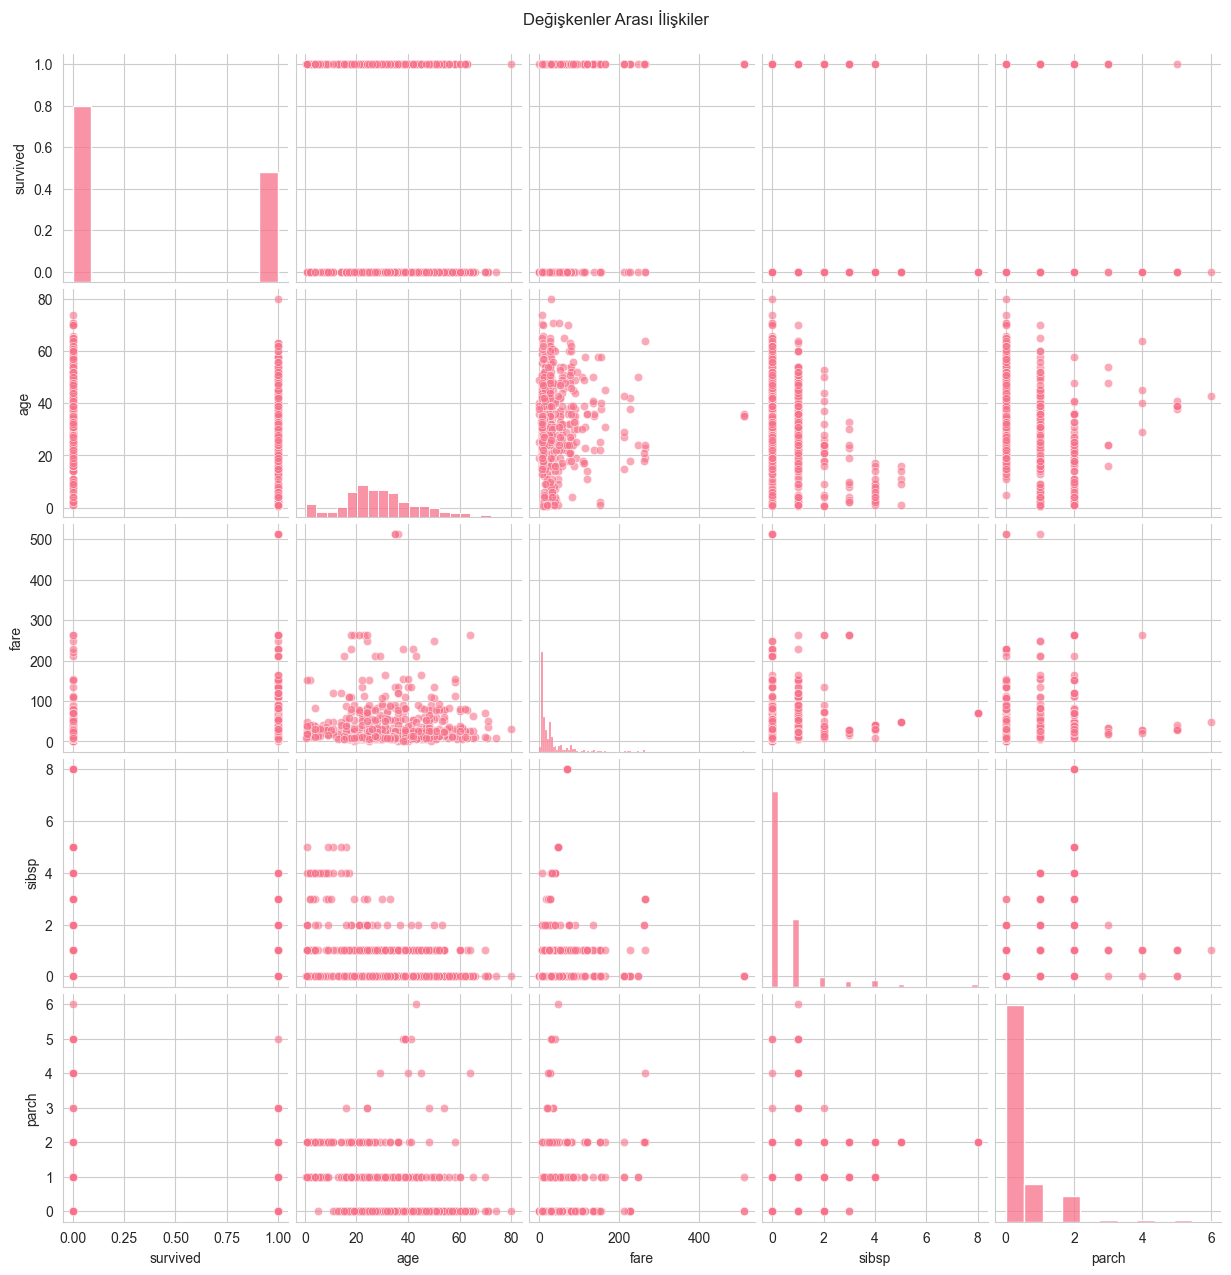

In [97]:
# Pairplot 
# Tüm sayısal değişkenler arasındaki ilişkileri tek bir grafik içinde gösterir.

secilen_col = ["survived","age","fare","sibsp","parch"]
sns.pairplot(df[secilen_col], diag_kind="hist", plot_kws={"alpha": 0.6})
# diag_kind --> diagonal (yani çapraz) doğrultusunda ne tür bir görselleştirme yapılacağını belirler.
plt.suptitle("Değişkenler Arası İlişkiler", y=1.02)
# y --> başlığın dikey konumu belirler.
plt.show()

<h3>Kategorik Analizler</h3>

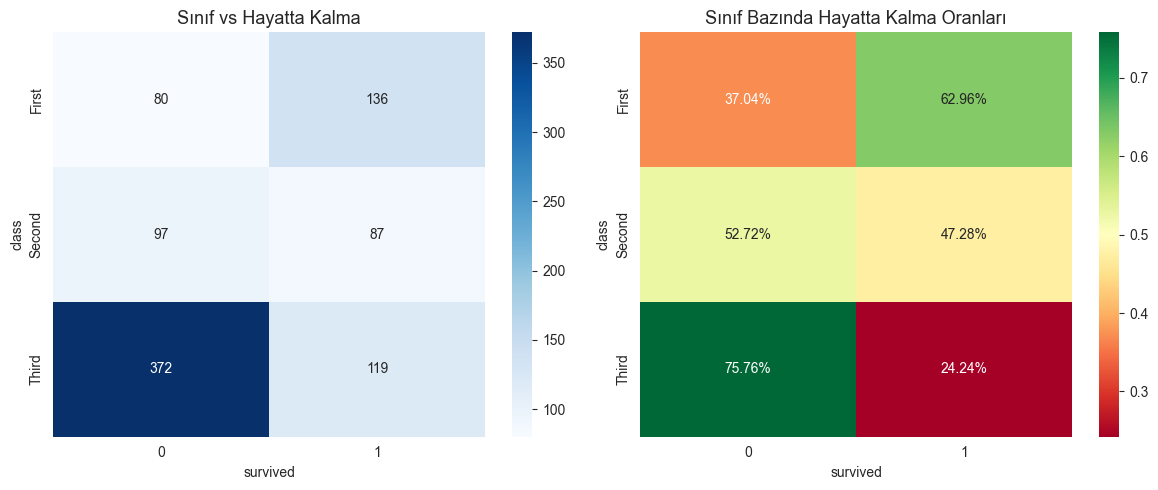

In [98]:
# Crosstab (Çapraz Tablo) ile Heatmap
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
capraztab = pd.crosstab(df["class"], df["survived"])
sns.heatmap(capraztab, annot=True, fmt="d", cmap="Blues")
plt.title("Sınıf vs Hayatta Kalma")

plt.subplot(1,2,2)
yasama_orani = pd.crosstab(df["class"], df["survived"], normalize="index")
sns.heatmap(yasama_orani, annot=True, fmt=".2%", cmap="RdYlGn")
plt.title("Sınıf Bazında Hayatta Kalma Oranları")

plt.tight_layout()
plt.show()

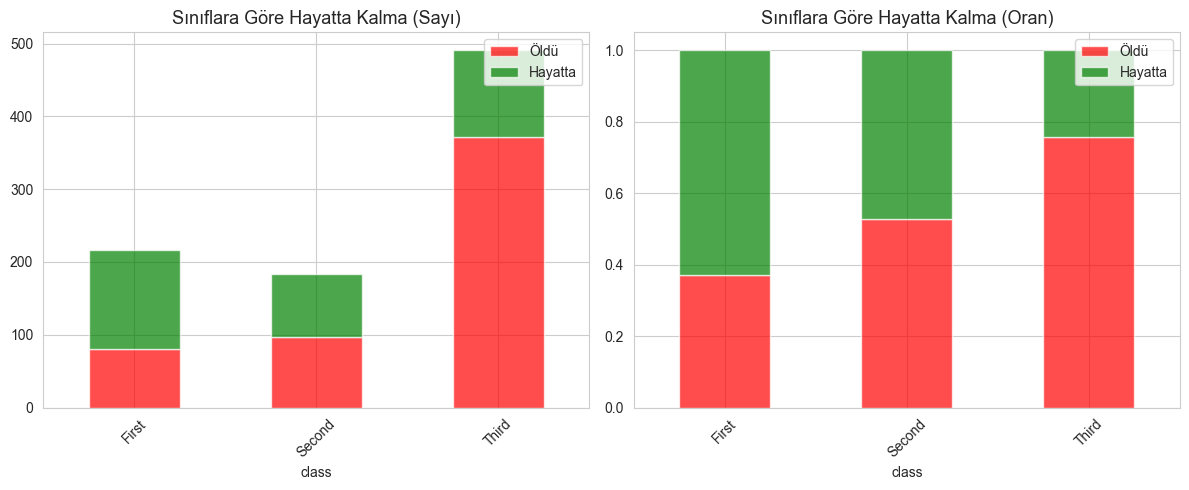

In [99]:
# Stacked Bar Chart
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
hayatta_kalma = df.groupby(["class","survived"]).size().unstack(fill_value=0)
# size() --> Her grubun (class, survived kombinasyonu) kaç satıra sahip olduğunu sayar. --> Sonuç olarak çok boyutlu bir Series elde ederiz.
# unstack(fill_value=0) --> Verileri çapraz tabloya (pivot tabloya) çevirir. --> Eğer bazı değerler yoksa (fill_value=0) ile eksik değerler 0 olarak doldurur.
hayatta_kalma.plot(kind="bar", stacked=True, ax=plt.gca(), color=["red","green"], alpha=0.7)
# stacked=True --> çubukların üst üste yığılmasını (Stacked) sağlar.
# ax=plt.gca() --> (gca: get current axes) şimdiki ekseni alır.
plt.title("Sınıflara Göre Hayatta Kalma (Sayı)")
plt.legend(["Öldü", "Hayatta"], loc="upper right")
plt.xticks(rotation=45)


plt.subplot(1,2,2)
hayatta_kalma_ = df.groupby(["class", "survived"]).size().unstack(fill_value=0)
hayatta_kalma_pct = hayatta_kalma_.div(hayatta_kalma_.sum(axis=1), axis=0)
# Her satırı (sınıfı) satır toplamına böler --> oranlara çevirmek için
hayatta_kalma_pct.plot(kind="bar", stacked=True, ax=plt.gca(), color=["red","green"], alpha=0.7)
plt.title("Sınıflara Göre Hayatta Kalma (Oran)")
plt.legend(["Öldü", "Hayatta"], loc = "upper right")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

<h1>Kompleks Analizler ve Özelleştirmeler - Advanced Level</h1>

<h3>1. Subplot'lar ile Kompleks Dashboard<h3>

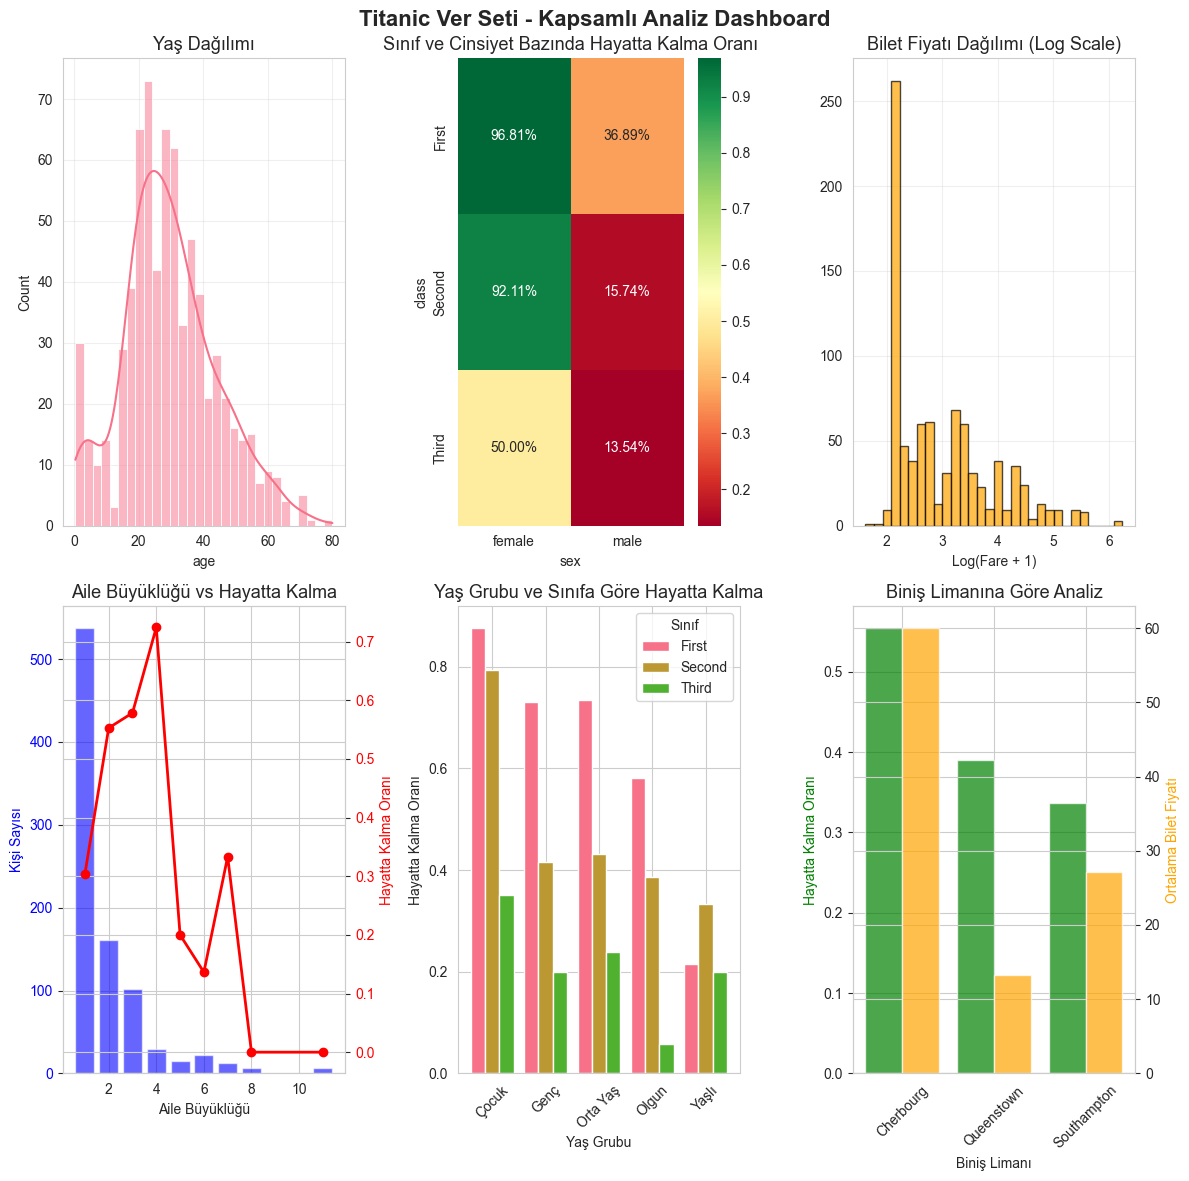

In [100]:
fig, axes = plt.subplots(2,3, figsize=(12,12))
fig.suptitle("Titanic Ver Seti - Kapsamlı Analiz Dashboard", fontsize=16, fontweight="bold")

# 1. Yaş Dağılımı
sns.histplot(data=df, x="age", bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Yaş Dağılımı")
axes[0,0].grid(True, alpha=0.3)



# 2. Sınıf ve Cinsiyet Bazında Hayatta Kalma
hayatta_pivot = df.pivot_table(values="survived", index="class", columns="sex", aggfunc="mean")
sns.heatmap(hayatta_pivot, annot=True, fmt=".2%", cmap="RdYlGn", ax=axes[0,1])
axes[0,1].set_title("Sınıf ve Cinsiyet Bazında Hayatta Kalma Oranı")



# 3. Bilet fiyatı dağılımı (log scale)
df_fare = df[ df["fare"] > 0] # 0'dan büyük fiyatlar
axes[0,2].hist(np.log1p(df_fare["fare"]), bins=30, alpha=0.7, color="orange", edgecolor="black")
#yukarıdaki kodun amacı, bilet ücretlerinin çarpık dağılımını daha düzgün görmemize olanak sağlar.
# log1p(x) = log(1 + x) anlamına yani x değerine önce 1 eklenir, sonra doğal logaritması (log_e ve ln) alınır.
# 1e-10 (1.10^(-10) gibi sayılarla uğraşıyorsak, log(1+x) kullanırsak hata payı oluşma ihtimali var. log1p(x) ise bu tür durumlar için idealdir.
axes[0,2].set_title("Bilet Fiyatı Dağılımı (Log Scale)")
axes[0,2].set_xlabel("Log(Fare + 1)")
axes[0,2].grid(True, alpha=0.3)



# 4. Aile Büyüklüğü Analizi
df["family_size"] = df["sibsp"] + df["parch"] + 1
family = df.groupby("family_size")["survived"].agg(["count","mean"]).reset_index()
family = family[ family["count"] >= 5] # En az 5 kişi olan gruplar

ax_twin = axes[1,0].twinx() #twinx() --> Aynı X eksenini kullanarak ikinci bir Y ekseni oluşturur (sağdaki eksen)
bars = axes[1,0].bar(family["family_size"], family["count"], alpha=0.6, color="blue", label="Kişi Sayısı") # bar grafiği çizimi
lines = ax_twin.plot(family["family_size"], family["mean"], color="red", marker="o", linewidth=2, markersize=6, label="Hayatta Kalma Oranı") # çizgi grafiği çizimi

axes[1,0].set_xlabel("Aile Büyüklüğü")
axes[1,0].set_ylabel("Kişi Sayısı", color="blue")
ax_twin.set_ylabel("Hayatta Kalma Oranı", color="red")
axes[1,0].set_title("Aile Büyüklüğü vs Hayatta Kalma")
axes[1,0].tick_params(axis="y", labelcolor="blue") # y eksenindeki yazılar (etiketler) renkli hale getirilir. Hangi grafik hangi eksene aitse o renkle uyumlu olur
ax_twin.tick_params(axis="y", labelcolor="red")

# Yukarıdaki grafik bana ne anlatmaya çalışır?
# Her aile büyüklüğü için kaç kişi var? (bar)
# Bu gruptaki kişilerin hayatta kalma oranı nedir? (çizgi)
# Sonuç olarak
    # Tek başına seyahat edenlerin hayatta kalma oranı,
    # 2-4 kişilik ailelerin hayatta kalma oranı,
    # Çok kalabalık ailelerde hayatta kalma oranı
# yorum yapabilriiz.




# 5. Yaş Grupları ve Sınıf Analizi
df["age_group"] = pd.cut(df["age"], bins=[0,18,25,40,60,100], labels=["Çocuk", "Genç", "Orta Yaş", "Olgun", "Yaşlı"])
age_class_survival = df.groupby(["age_group", "class"])["survived"].mean().unstack()
age_class_survival.plot(kind="bar", ax=axes[1,1], width=0.8)
axes[1,1].set_title("Yaş Grubu ve Sınıfa Göre Hayatta Kalma")
axes[1,1].set_xlabel("Yaş Grubu")
axes[1,1].set_ylabel("Hayatta Kalma Oranı")
axes[1,1].legend(title="Sınıf")
axes[1,1].tick_params(axis="x", rotation=45)



# 6. Biniş Limanı Analizi
embark_stats = df.groupby("embark_town").agg({"survived": ["count","sum","mean"],"fare":"mean"}).round(3)
embark_stats.columns = ["Toplam","Hayatta","Oran","Ort_Fiyat"]
embark_stats = embark_stats.dropna()

x_pos = np.arange(len(embark_stats))
bars1 = axes[1,2].bar(x_pos - 0.2, embark_stats["Oran"], 0.4,
                      label = "Hayatta Kalma Oranı", alpha=0.7,
                      color="green")
ax_twin2 = axes[1,2].twinx()
bars2 = ax_twin2.bar(x_pos + 0.2, embark_stats["Ort_Fiyat"], 0.4,
                     label = "Ortalama Fiyat", alpha=0.7,
                     color ="orange")

axes[1,2].set_xlabel("Biniş Limanı")
axes[1,2].set_ylabel("Hayatta Kalma Oranı", color="green")
ax_twin2.set_ylabel("Ortalama Bilet Fiyatı", color="orange")
axes[1,2].set_title("Biniş Limanına Göre Analiz")
axes[1,2].set_xticks(x_pos)
axes[1,2].set_xticklabels(embark_stats.index, rotation=45)


plt.tight_layout()
plt.show()

<h3>2. İstatiksel Görselleştirmeler</h3>

In [101]:
# Güven Aralığı (Confidence Intervals) ile Bar Plot
def calculate_confidence_interval(data, confidence=0.95):
    """Bootstrap yöntemi ile güven aralığı hesaplama"""
    # Güven düzeyi (varsayılan %95)
        # Yani: Gerçek ortalama bu aralıkta %95 ihtimalle bulunur.

    n_bootstrap = 1000
    # Bootstrap, bir veri kümesinden tekrar tekrar, rastgele ve geri koyarak örnek alma yöntemidir. Amaç: Orijinal verinin istatistiksel belirsizliğini (örneğin ortalama ne kadar güvenilir?) tahmin etmektir.
    bootstrap_means = []

    for _ in range(n_bootstrap):
        sample = np.random.choice(data.dropna(), size=len(data.dropna()), replace=True)
        bootstrap_means.append(np.mean(sample))
    # Yukarıdaki işlem 1000 kez tekrar edip, sonuçları ortalama olarak kaydediyoruz.

    alpha = 1 - confidence # 1 - 0.95 = 0.05 --> %5 hata payı
    lower = np.percentile(bootstrap_means, (alpha/2) * 100)
        # Alt sınır: %2.5 
    upper = np.percentile(bootstrap_means, (1 - alpha/2) * 100)
        # Üst sınır: %97.5
    # Yukarıdaki kodun anlamı, Alt Sınır'dan sonrasını ve Üst Sınır'dan sonrasını at. Yani benim gerçek ortalamam 2.5 ile 97.5 arasında olacağını belli ediyorum. 
    # Alt Sınır <= Gerçek Ortalama <= Üst Sınır
    # Sonuç olarak Gerçek Ortalama, %95 ihtimalle 15.7 ile 20.3 arasında diyeceğiz.

    return lower, upper

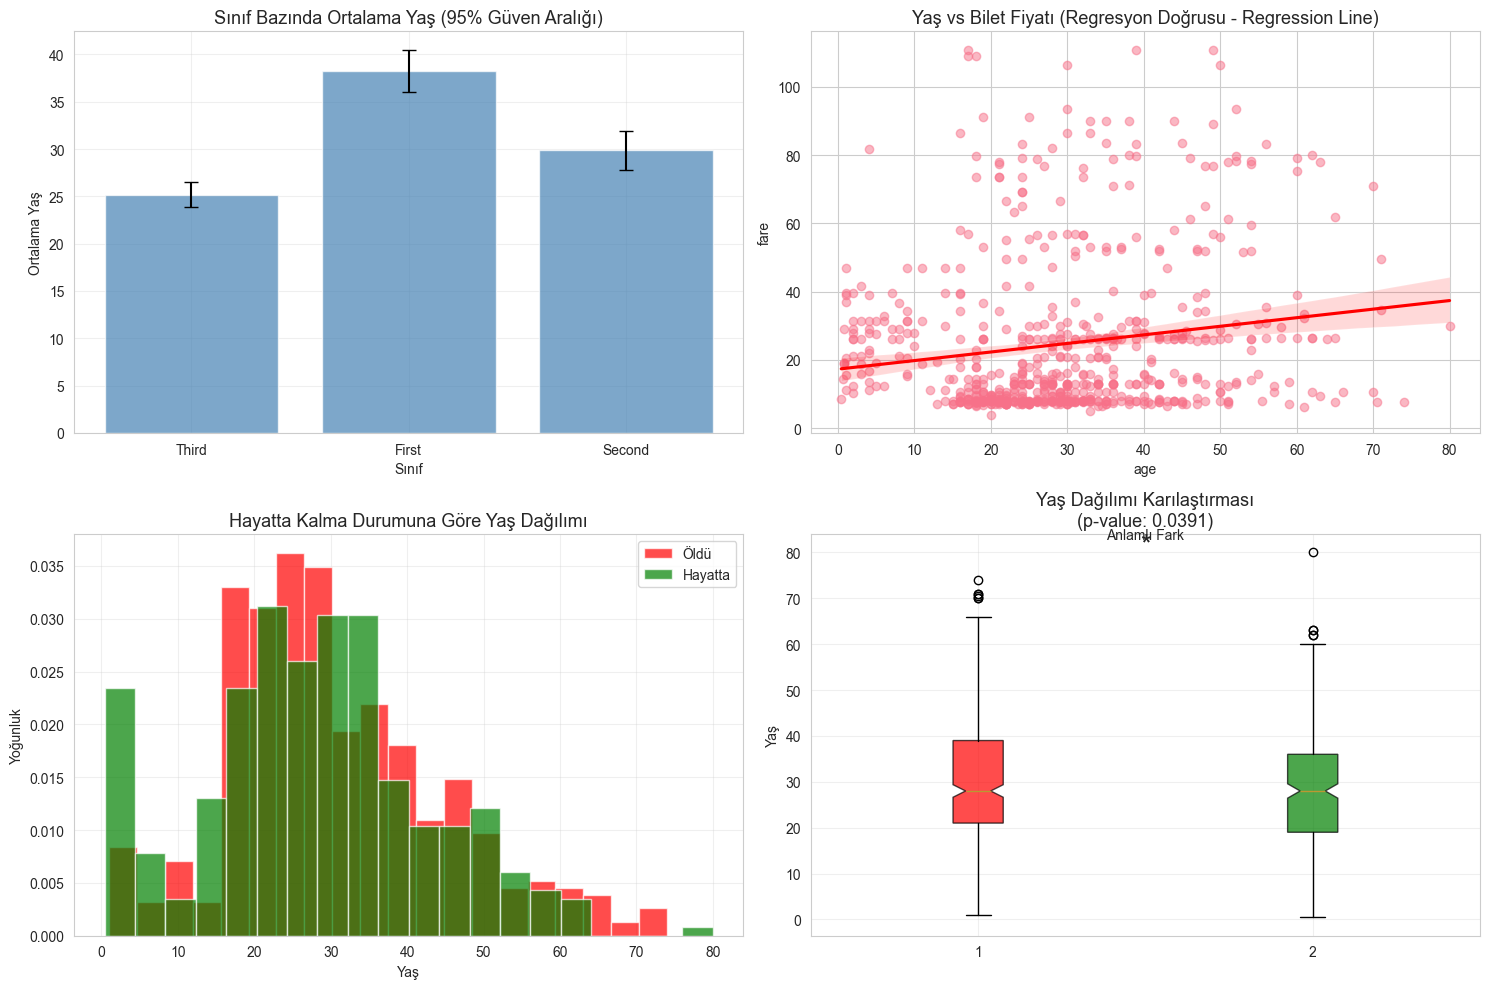

In [102]:
plt.figure(figsize=(15,10))

# Subplot 1: Sınıf bazında yaş güven aralıkları
plt.subplot(2,2,1)
class_age_stats = []
classes = df["class"].unique()

for cls in classes:
    age_data = df[df["class"] == cls]["age"]
    mean_age = age_data.mean()
    lower, upper = calculate_confidence_interval(age_data)
    class_age_stats.append({"class":cls, "mean":mean_age, "lower":lower, "upper":upper})

class_age_df = pd.DataFrame(class_age_stats)
x_pos = range(len(class_age_df))

plt.bar(x_pos, class_age_df["mean"], yerr=[class_age_df["mean"] - class_age_df["lower"],
                                           class_age_df["upper"] - class_age_df["mean"]],
                                           capsize=5, alpha=0.7, color="steelblue")
plt.xlabel("Sınıf")
plt.ylabel("Ortalama Yaş")
plt.title("Sınıf Bazında Ortalama Yaş (95% Güven Aralığı)")
plt.xticks(x_pos, class_age_df["class"])
plt.grid(True, alpha=0.3)




# Subplot 2: Regression Plot
plt.subplot(2,2,2)
# Fare ve Age arasındaki ilişki (outlier'ları temizleyerek)
df_clean = df[(df["fare"]>0) & (df["fare"] < df["fare"].quantile(0.95))].copy()
# En yüksek %5'i dışlıyor. Geri kalan verileri df_clean değişkenine kopyalıyor.
sns.regplot(data=df_clean, x="age", y="fare", scatter_kws={"alpha": 0.5}, line_kws={"color":"red"})
# Regplot --> hem dağılım grafiği hem de regresyon çizgisiyle birlikte gösterir.
plt.title("Yaş vs Bilet Fiyatı (Regresyon Doğrusu - Regression Line)")



# Subplot 3: Distribution Comparison
plt.subplot(2,2,3)
survived_ages = df[df["survived"] == 1]["age"].dropna()
# Sadece yaş bilgisi mevcut olan hayatta kalan yolcular kalır.
died_ages = df[df["survived"] == 0]["age"].dropna()

plt.hist(died_ages, bins=20, alpha=0.7, label="Öldü", color="red", density=True)
plt.hist(survived_ages, bins=20, alpha=0.7, label="Hayatta", color="green", density=True)
# Yoğunluk = (gözlem sayısı) / (toplam gözlem x bin genişliği) formülüyle hesaplanır.
plt.xlabel("Yaş")
plt.ylabel("Yoğunluk")
plt.title("Hayatta Kalma Durumuna Göre Yaş Dağılımı")
plt.legend()
plt.grid(True, alpha=0.3)



# Subplot 4: Box Plot with Statistical Annotations
plt.subplot(2,2,4)
from scipy import stats

# T-test for age difference between surviviors and non-survivors
# Hayatta kalanlar ile kalamayanlar arasındaki yaş farkı için T-testi

t_stat, p_value = stats.ttest_ind(died_ages, survived_ages)
# died_ages: Ölen yolcuların yaşları
# survived_ages: Hayatta kalan yolcuların yaşları
# Çıktılar:
    # t_stat: T-test istatistiği
    # p_value: İstatistiksel anlamlılık düzeyi
box_plot = plt.boxplot([died_ages, survived_ages], label=["Öldü","Hayatta"],
                       patch_artist=True, notch=True) 
# kutu grafiği
    # [died_ages, survived_ages]: Karşılaştırılacak veri grupları
    # label: Grup isimleri
    # patch_artist=True --> Kutuların renklendirilmesini sağlar
    # notch=True --> Medyan için çentik oluşturur (Güven aralığını gösterir)
box_plot["boxes"][0].set_facecolor("red")
box_plot["boxes"][0].set_alpha(0.7)
box_plot["boxes"][1].set_facecolor("green")
box_plot["boxes"][1].set_alpha(0.7)

plt.ylabel("Yaş")
plt.title(f"Yaş Dağılımı Karılaştırması\n(p-value: {p_value:.4f})")
plt.grid(True, alpha=0.3)

# Significance Annotation (Anlamlılık Belirteci)
if p_value < 0.05:
    # p_value < 0.05 --> Hipotez testlerinde yaygın olarak kabul gören anlamlılık eşiği
    # Null Hipotez (H_0): Hayatta kalanlar ve ölenler arasında yaş ortalaması açısından fark yoktur.
    # p_value değeri: Bu hipotezin doğru olduğu varsayımıyla, gözlemlenen bir farkın ortaya çıkma olasılığdır.
        # p < 0.05 Null hipotez reddedilir (anlamlı fark var)
        # p >= 0.05 Null hipotez reddedilemez (fark yok denilemez, ancak kanıt yetersiz)
    plt.text(1.5, max(df["age"].max(), 70), "*",  fontsize=20, ha="center")
    plt.text(1.5, max(df["age"].max(), 70) + 3, "Anlamlı Fark", fontsize=10, ha="center")

    # Sonuç:
        # Tip-1 (yanlış pozitif) olasılığını %5 ile sınırlar.
        # **** p-değeri tek başına bir araştırmanın kalitesini göstermez, veri kalitesi ve metodoloji de kritiktir.
plt.tight_layout()
plt.show()

<h1>Senior Level - İleri Teknikler ve Optimizasyon</h1>

In [103]:
def create_advanced_survival_analysis(data):
    """
    Gelişmiş hayatta kalma analizi dashboard'u 
    """
    fig = plt.figure(figsize=(20,15))
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

    # Ana başlık

    fig.suptitle("Titanic Hayatta Kalma Analizi - Senior Level Dashboard",
                 fontsize=20, fontweight="bold", y=0.95)
    
    # 1. Survival Rate by Multiple Factors (Treemap Style)
    ax1 = fig.add_subplot(gs[0, :2])
    survival_multi = data.groupby(["class","sex"])["survived"].agg(["count","mean"]).reset_index()


    # Bubble Chart (Kabarcık Grafiği)
    for i, row in survival_multi.iterrows():
        x = ["First", "Second", "Third"].index(row["class"])
        y = ["male", "female"].index(row["sex"])
        size = row["count"] * 3
        color = row["mean"]

        scatter = ax1.scatter(x, y, s=size, c=color, alpha=0.7, cmap="RdYlGn", vmin=0, vmax=1,
                            edgecolors="black")
        ax1.annotate(f"{row['mean']:.1%}\n({row['count']})", 
                     (x,y), ha="center", va="center", fontweight="bold")
        
    ax1.set_xticks(range(3))
    ax1.set_xticklabels(["First", "Second", "Third"])
    ax1.set_yticks(range(2))
    ax1.set_yticklabels(["Male", "Female"])
    ax1.set_title("Sınıf ve Cinsiyete Göre Hayatta Kalma Oranı\n(Balon Boyutu - Yolcu Sayısı)")


    # Colorbar
    cbar = plt.colorbar(scatter, ax=ax1)
    cbar.set_label("Hayatta Kalma Oranı")



    # 2. KDE İle Yaş Dağılımı - (Age Distribution with KDE)
    ax2 = fig.add_subplot(gs[0, 2:])
    for survival_status in [0, 1]:
        subset = data[data["survived"] == survival_status]["age"].dropna()
        label = "Öldü" if survival_status == 0 else "Hayatta"
        color = "red" if survival_status == 0 else "green"

        sns.histplot(subset, kde=True, alpha=0.6, label=label, color=color, ax=ax2, stat="density")

    ax2.set_title("Hayatta Kalma Durumuna Göre Yaş Dağılımı")
    ax2.legend()
    ax2.grid(True, alpha=0.3)



    # 3. Yüzdelik Dilimlere Göre Fiyat Analizi - (Fare Analysis with Quantiles)
    ax3 = fig.add_subplot(gs[1,0])
    fare_quantiles = data["fare"].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).round(2)
    data["fare_category"] = pd.cut(data["fare"], bins=[0, fare_quantiles[0.25],
                                                       fare_quantiles[0.75],
                                                       fare_quantiles[0.95],
                                                       data["fare"].max()],
                                                       labels=["Düşük", "Orta", "Yüksek", "Premium"])
    
    fare_survival = data.groupby("fare_category")["survived"].mean()
    bars = ax3.bar(fare_survival.index, fare_survival.values, 
                   color =["red", "orange", "yellow", "green"], alpha=0.7)
    
    # Sütun Grafik Değer Etiketleri - (Bar Value Annotations)
    for bar, value in zip(bars, fare_survival.values):
        ax3.annotate(f"{value:.1%}", (bar.get_x() + bar.get_width()/2,
                                      bar.get_height()), ha="center", va="bottom", fontweight="bold")
        
    ax3.set_title("Ücret Kategorisine Göre Hayatta Kalma Oranı")
    ax3.set_ylabel("Hayatta Kalma Oranı")
    ax3.tick_params(axis="x", rotation=45)



    # 4. Aile Büyüklüğü Etkisi - (Family Size Effect)
    ax4 = fig.add_subplot(gs[1,1])
    data["family_size"] = data["sibsp"] + data["parch"] + 1
    family_survival = data.groupby("family_size")["survived"].agg(["count", "mean"])
    family_survival = family_survival[family_survival["count"] >= 3]

    # Çift Eksenli Grafik - (Dual axis plot)
    ax4_twin = ax4.twinx()

    bars = ax4.bar(family_survival.index, family_survival["count"],
                   alpha=0.6, color="lightblue", label="Count")
    line = ax4_twin.plot(family_survival.index, family_survival["mean"],
                        color="red", marker="o", linewidth=3, markersize=8, label="Hayatta Kalma Oranı")
    
    ax4.set_xlabel("Aile Büyüklüğü")
    ax4.set_ylabel("Yolcu Sayısı", color="blue")
    ax4_twin.set_ylabel("Hayatta Kalma Oranı", color="red")
    ax4.set_title("Aile Büyüklüğü vs Hayatta Kalma")



    # 5. Biniş Limanı Analizi - (Port of Embarkation Analysis)
    ax5 = fig.add_subplot(gs[1,2:])
    port_analysis = data.groupby(["embark_town", "class"])["survived"].mean().unstack()

    # Yığılmış Yatay Çubuk Grafik - (Stacked horizontal bar chart)
    port_analysis.plot(kind="barh", ax=ax5, width=0.8,
                       color=["gold", "silver", "#CD7F32"]) # Bronze color for Third
    ax5.set_title("Liman Sınıfına Göre Hayatta Kalma Oranı") # Survival Rate by Port Class
    ax5.set_xlabel("Hayatta Kalma Oranı")
    ax5.legend(title="Class", bbox_to_anchor=(1.05, 1), loc="upper left")



    # 6. Kümeleme ile Korelasyon Isı Haritası - Correlation Heatmap with Clustering
    ax6 = fig.add_subplot(gs[2,:2])

    # Korelasyon için veriyi hazırlama - Prepare data for correlation
    corr_data = data[["survived", "pclass", "age", "sibsp", "parch", "fare"]].copy()
    corr_data["is_male"] = (data["sex"] == "male").astype(int)
    corr_data["family_size"] = data["sibsp"] + data["parch"] + 1

    # Korelasyon Matrisi Hesaplama - Calculate Correlation Matrix
    corr_matrix = corr_data.corr()

    # Üst Üçgen için maske oluştur - Create mask for upper triangle
        # Gereksiz tekrarları önlemek, Kümeleme ve analizlerde netlik için üst üçgen kullanırız.
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        # np.ones_like --> corr_matrix kadar birim matris oluştur. Veri tipi bool olacak.
        # np.triu --> matrisin üst üçgen kısmını alır.

    # Custom Colormap
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap,
                center=0, square=True, ax=ax6, cbar_kws={"label":"Korelasyon Katsayısı"}) # Korelasyon Katsayısı
    ax6.set_title("Korelasyon Matrisi (Alt Üçgen)") # Correlation Matrix (Lower Triangle)




    # 7. Detaylı Hayatta Kalma Olasılığı
    ax7 = fig.add_subplot(gs[2, 2:])
    
    # Yaş ve Sınıfa Göre Hayatta Kalma İhtimali Oluşturma - Create survival probability by age and class
    age_bins = np.arange(0, 81, 5)
        # Yaşları 0-80 arası 5'er yıllık gruplara ayırma
    age_centers = age_bins[:-1] + 2.5
        # Bu grupların merkez noktaları. (x koordinatındaki 2.5, 7.5, ...)
    
    # Her bir yolcu sınıfı için döngüye alıyoruz.
    for cls in data['class'].unique():
        survival_probs = []
        # Her bir yaş aralığı için:
            # İlgili yaş grubuna ve sınıfa ait olan veriler filtreleniyor.
        for i in range(len(age_bins)-1): 
            subset = data[(data['age'] >= age_bins[i]) & 
                         (data['age'] < age_bins[i+1]) & 
                         (data['class'] == cls)]
            if len(subset) > 0:
                # Bu grupta en az bir kişi varsa,
                    # survived sütununun ortalaması alınır. --> hayatta kalma olasılığı.
                prob = subset['survived'].mean()
            else:
                # Kimse yoksa (grup boşsa), NaN atanır.
                prob = np.nan
            survival_probs.append(prob)
        
    # Hata Çubukları (Güven Aralıkları) ile grafik - Plot with error bars (confidence intervals)
    ax7.plot(age_centers, survival_probs, marker='o', linewidth=2, 
            label=f'{cls} Class', markersize=6)
    
    ax7.set_xlabel('Yaş')
    ax7.set_ylabel('Hayatta Kalma Olasılığı') # Survival Probability
    ax7.set_title('Yaş ve Sınıfa Göre Hayatta Kalma Olasılığı') # Survival Probability by Age and Class
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    ax7.set_ylim(0, 1)

    plt.show()

    return fig

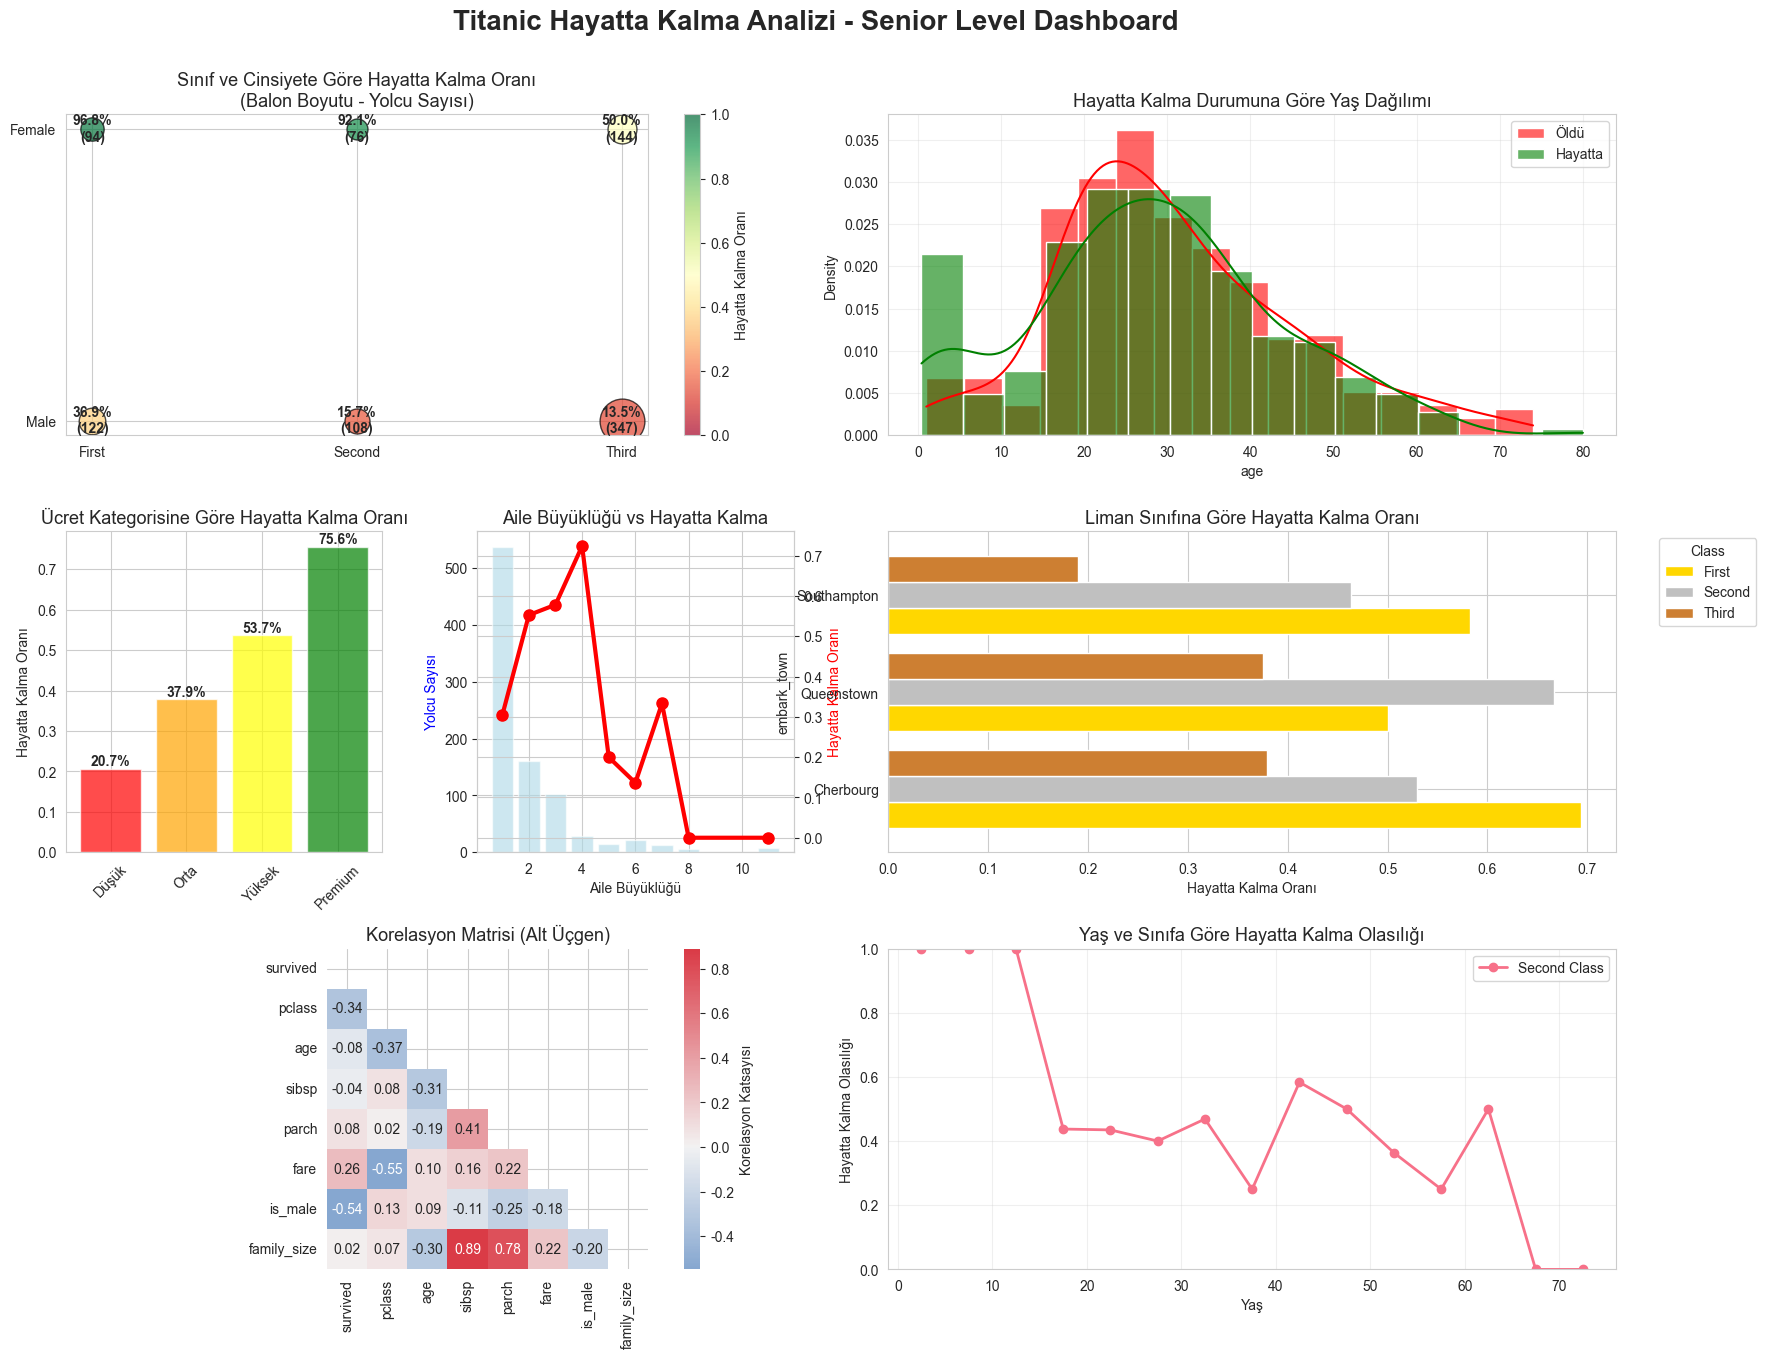

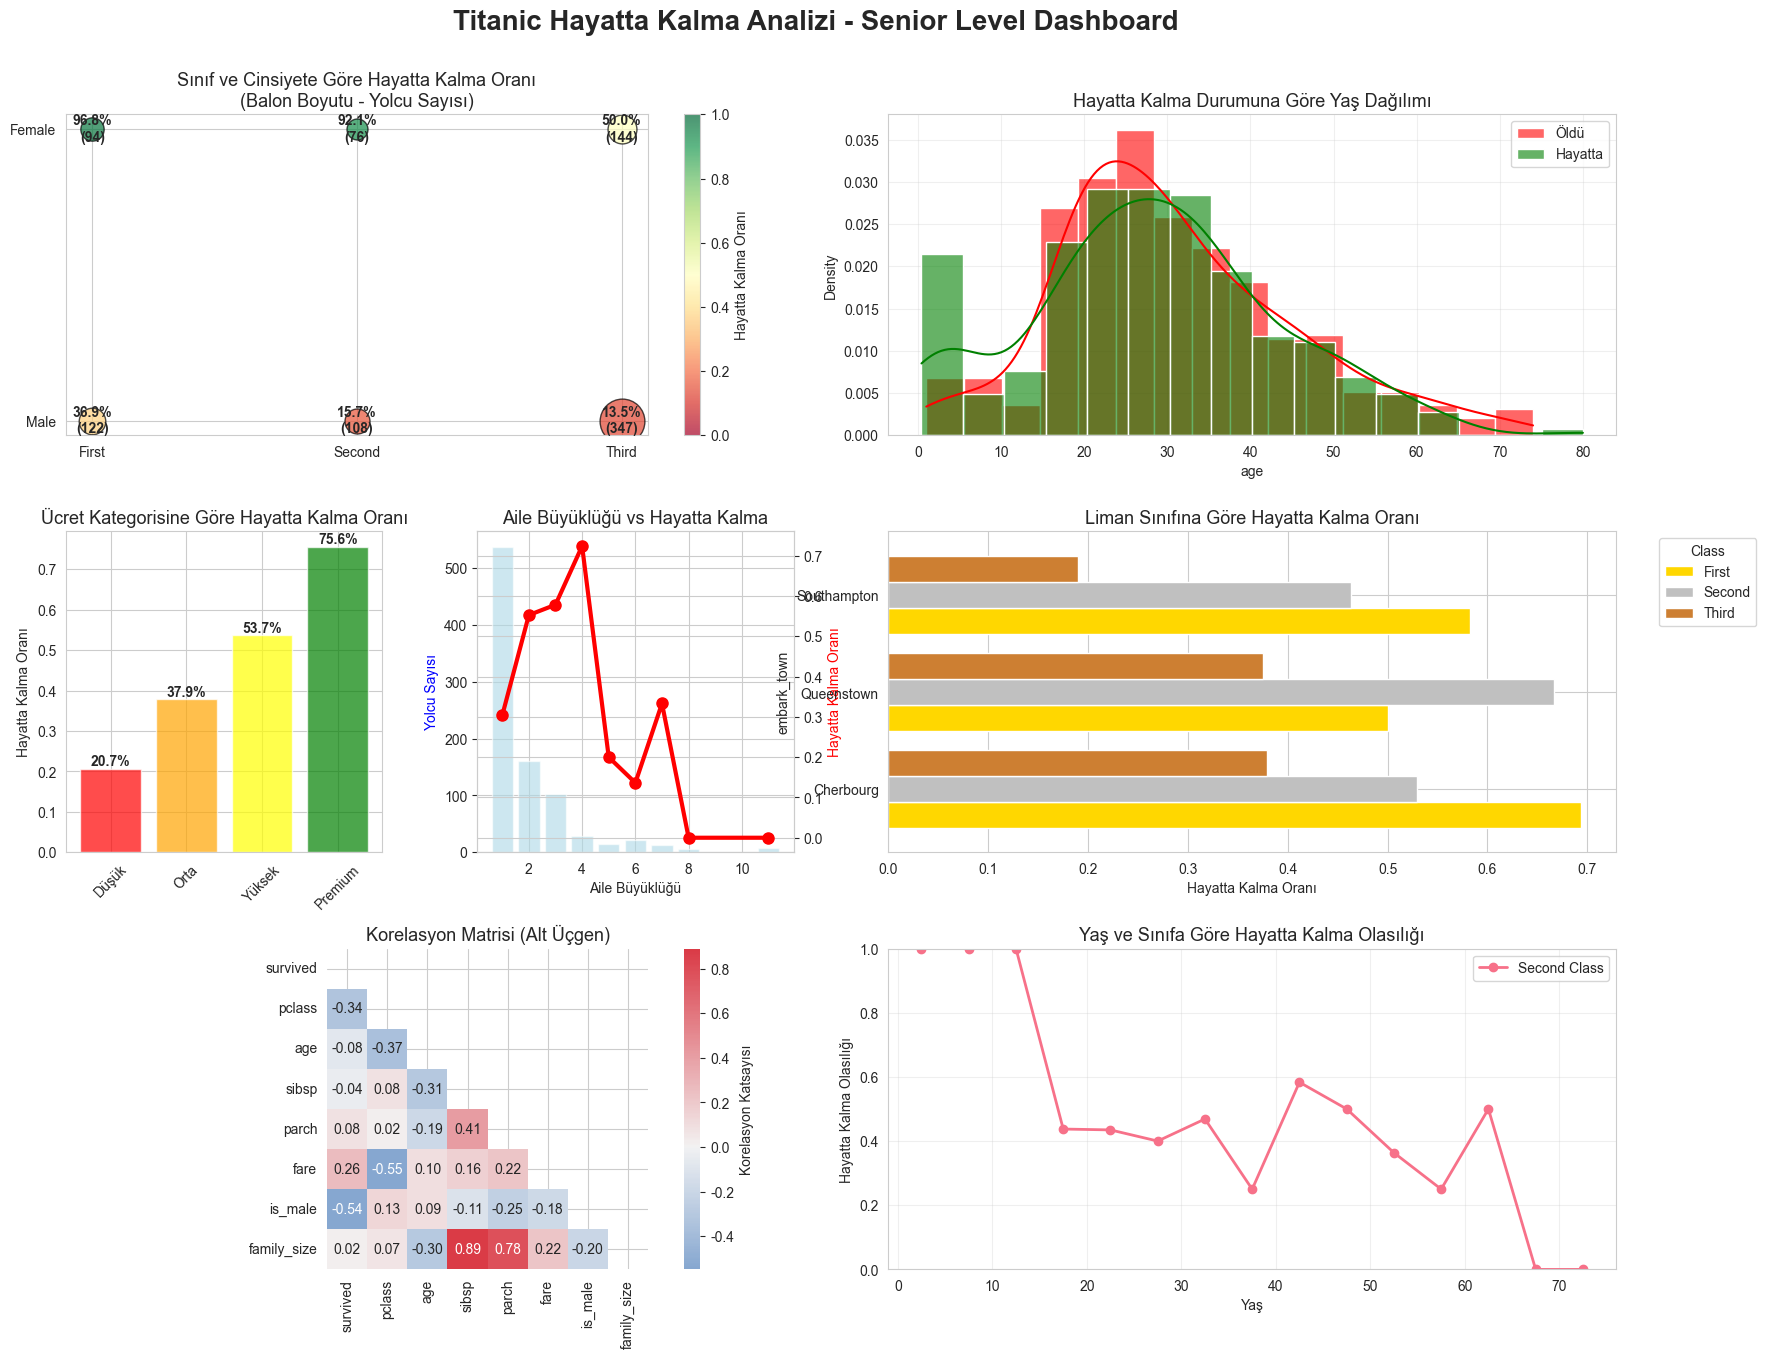

In [104]:
create_advanced_survival_analysis(df)

In [105]:
def create_animated_style_plot(data):
    """
    Animasyon stilinde statik görselleştirme
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Animasyon Tarzında Statik Görselleştirmeler', fontsize=16, fontweight='bold') # Animated-Style Static Visualizations
    
    # 1. Kademeli Çubuk Grafik - Progressive Bar Chart
    ax1 = axes[0, 0]
    
    # Farklı Kategorilere Göre Hayatta Kalma - Survival by different categories
    categories = ['Overall', 'Male', 'Female', '1st Class', '2nd Class', '3rd Class']
    survival_rates = [
        data['survived'].mean(),
        data[data['sex'] == 'male']['survived'].mean(),
        data[data['sex'] == 'female']['survived'].mean(),
        data[data['class'] == 'First']['survived'].mean(),
        data[data['class'] == 'Second']['survived'].mean(),
        data[data['class'] == 'Third']['survived'].mean()
    ]
    colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))
    # plt.cm --> Matplotlib'in renk haritası (colormap) modülü
    # viridis --> Matplotlib'in içinde tanımlı olan renk skalası
    # viridis() --> fonksiyonu, 0 ile 1 arasında değerlere göre renk üretir.
    
    bars = ax1.barh(categories, survival_rates, color=colors, alpha=0.8) # yatay çubuk grafik
    # Çubuk grafik üzerinde değer göster - Add value labels on bars
    for i, (bar, rate) in enumerate(zip(bars, survival_rates)):
        width = bar.get_width() # Her çubuğun yatay uzunluğunu (değerini) alır. Yani hayatta kalma oranını grafik üzerindeki uzunluğu.
        ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{rate:.1%}', ha='left', va='center', fontweight='bold') # text() --> eksen (ax1) üzerine metin (etiket) yazar.
    
    ax1.set_xlabel('Hayatta Kalma Oranı') # Survival Rate
    ax1.set_title('Kategorilere Göre Hayatta Kalma Oranı') # Survival Rates by Category
    ax1.set_xlim(0, 1)
    ax1.grid(True, alpha=0.3, axis='x')
    




    # 2. Boyut ve Renk Kodlamalı Balon (Kabarcık) Grafiği - Bubble Chart with Size and Color Encoding
    ax2 = axes[0, 1]
    
    # Hayatta Kalma Bilgisine Göre Kodlanmış Yaş ve Ücret Grafiği  Age vs Fare with survival encoding
    scatter_data = data.dropna(subset=['age', 'fare']) # Sadece "age" ve "fare" sütunlarındaki NaN değerlerine bak ve sil
    scatter_data = scatter_data[scatter_data['fare'] <= scatter_data['fare'].quantile(0.95)] # fare sütununun ilk %95'lik kısmını alır. Yani en yüksek %5'lik kısmını dışarıda bırakır.
    
    # Aile büyüklüğüne göre kabarcık boyutlarını oluştur - Create bubble sizes based on family size
    scatter_data['family_size'] = scatter_data['sibsp'] + scatter_data['parch'] + 1
    sizes = scatter_data['family_size'] * 30 # Her bir aileyi 30 ile çarpmamızın nedeni, kabarcık grafiğinde yuvarlakların boyutları genellikle piksel cinsinden büyüklükle orantılıdır. Yani Küçük aile --> küçük yuvarlak, Büyük aile --> büyük yuvarlak
    
    scatter = ax2.scatter(scatter_data['age'], scatter_data['fare'], 
                         c=scatter_data['survived'], s=sizes, 
                         alpha=0.6, cmap='RdYlGn', edgecolors='black', linewidth=0.5)
    
    ax2.set_xlabel('Yaş')
    ax2.set_ylabel('Bilet Fiyatı')
    ax2.set_title('Yaş vs Bilet Fiyatı\n(Renk: Hayatta Kalma, Boyut: Aile Büyüklüğü)')
    ax2.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Hayatta Kalma (0=Ölü, 1=Hayatta)')
    



    # 3. Kutupsal Projeksiyon Simülasyonu ile Radar Grafik - Radar Chart Style (using polar projection simulation)
    ax3 = axes[1, 0]
    
    # Farklı Gruplar için İstatistikleri Hesaplama - Calculate statistics for different groups
    #stats_categories = ['Survival Rate', 'Avg Age', 'Avg Fare', 'Family Size', 'First Class %']
    stats_categories = ['Hayatta Kalma Oranı', 'Avg Yaş', 'Avg Ücret', 'Aile Büyüklüğü', 'Birinci Sınıf %']
    
    # Karşılaştırma için tüm değerleri 0 ile 1 arasında ölçeklendir - Normalize all values to 0-1 scale for comparison
    def normalize_stats(group_data):
        stats = []
        stats.append(group_data['survived'].mean())  # Hayatta Kalma Oranı - Survival rate --> Hayatta kalanların oranı %34 diyelim, verimiz 0.34 olacak.
        stats.append(group_data['age'].mean() / 80)  # Normalized age --> Ortalama yaş alınır, sonra en büyük değere bölünür.
        stats.append(np.log1p(group_data['fare'].mean()) / np.log1p(data['fare'].max()))  # Log normalized fare --> Bilet fiyatların logaritmik olarak ölçeklendirir. Sonra tüm veri kümesindeki maksimum log(fare) ile normalize edilir.
        stats.append((group_data['sibsp'] + group_data['parch'] + 1).mean() / 11)  # Normalized family size --> Aile büyüklüğünün ortalaması alınır sonra 11'e böldük. (Maksimum aile büyüklüğünü 11 olarak kabul edilmiş)
        stats.append((group_data['class'] == 'First').mean())  # First Class Oranı - First class percentage --> Birinci sınıfta yolculuk edenlerin yüzdesi
        return stats
    
    male_stats = normalize_stats(data[data['sex'] == 'male'])
    female_stats = normalize_stats(data[data['sex'] == 'female'])
    
    x_pos = np.arange(len(stats_categories))
    width = 0.35
    
    bars1 = ax3.bar(x_pos - width/2, male_stats, width, label='Erkek', 
                   alpha=0.7, color='steelblue')
    bars2 = ax3.bar(x_pos + width/2, female_stats, width, label='Kadın', 
                   alpha=0.7, color='pink')
    
    ax3.set_xlabel('İstatistik Kategorileri') # Statistics Categories
    ax3.set_ylabel('Normalleştirilmiş Değerler (0-1)') # Normalized Values (0-1)
    ax3.set_title('Erkek-Kadın İstatistik Karşılaştırılması') # Male vs Female Statistics Comparison
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(stats_categories, rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    





    # 4. Akış Grafiği Stili - Stream Plot Style
    ax4 = axes[1, 1]
    
    # Yaşa Dayalı Hayatta Kalma Eğilimlerini Oluşturma - Create age-based survival trends
    age_ranges = [(0, 15), (15, 30), (30, 45), (45, 60), (60, 100)]
    age_labels = ['0-15', '15-30', '30-45', '45-60', '60+']
    
    class_survival_by_age = []
    
    for age_min, age_max in age_ranges:
        age_subset = data[(data['age'] >= age_min) & (data['age'] < age_max)]
        class_counts = []
        for cls in ['First', 'Second', 'Third']:
            class_subset = age_subset[age_subset['class'] == cls]
            survival_count = class_subset['survived'].sum()
            class_counts.append(survival_count)
        class_survival_by_age.append(class_counts)
    
    class_survival_by_age = np.array(class_survival_by_age).T
    
    # Yığılmış alan grafiği oluşturma - Create stacked area plot
    ax4.stackplot(range(len(age_labels)), class_survival_by_age, 
                 labels=['Birinci Sınıf', 'İkinci Sınıf', 'Üçüncü Sınıf'],
                 colors=['gold', 'silver', '#CD7F32'], alpha=0.8)
    
    ax4.set_xlabel('Yaş Gruplarıs') # Age Groups
    ax4.set_ylabel('Hayatta Kalanların Sayısı') # Number of Survivors
    ax4.set_title('Yaş Grubu ve Sınıfa Göre Hayatta Kalanlar') # Survivors by Age Group and Class
    ax4.set_xticks(range(len(age_labels)))
    ax4.set_xticklabels(age_labels)
    ax4.legend(loc='upper right')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

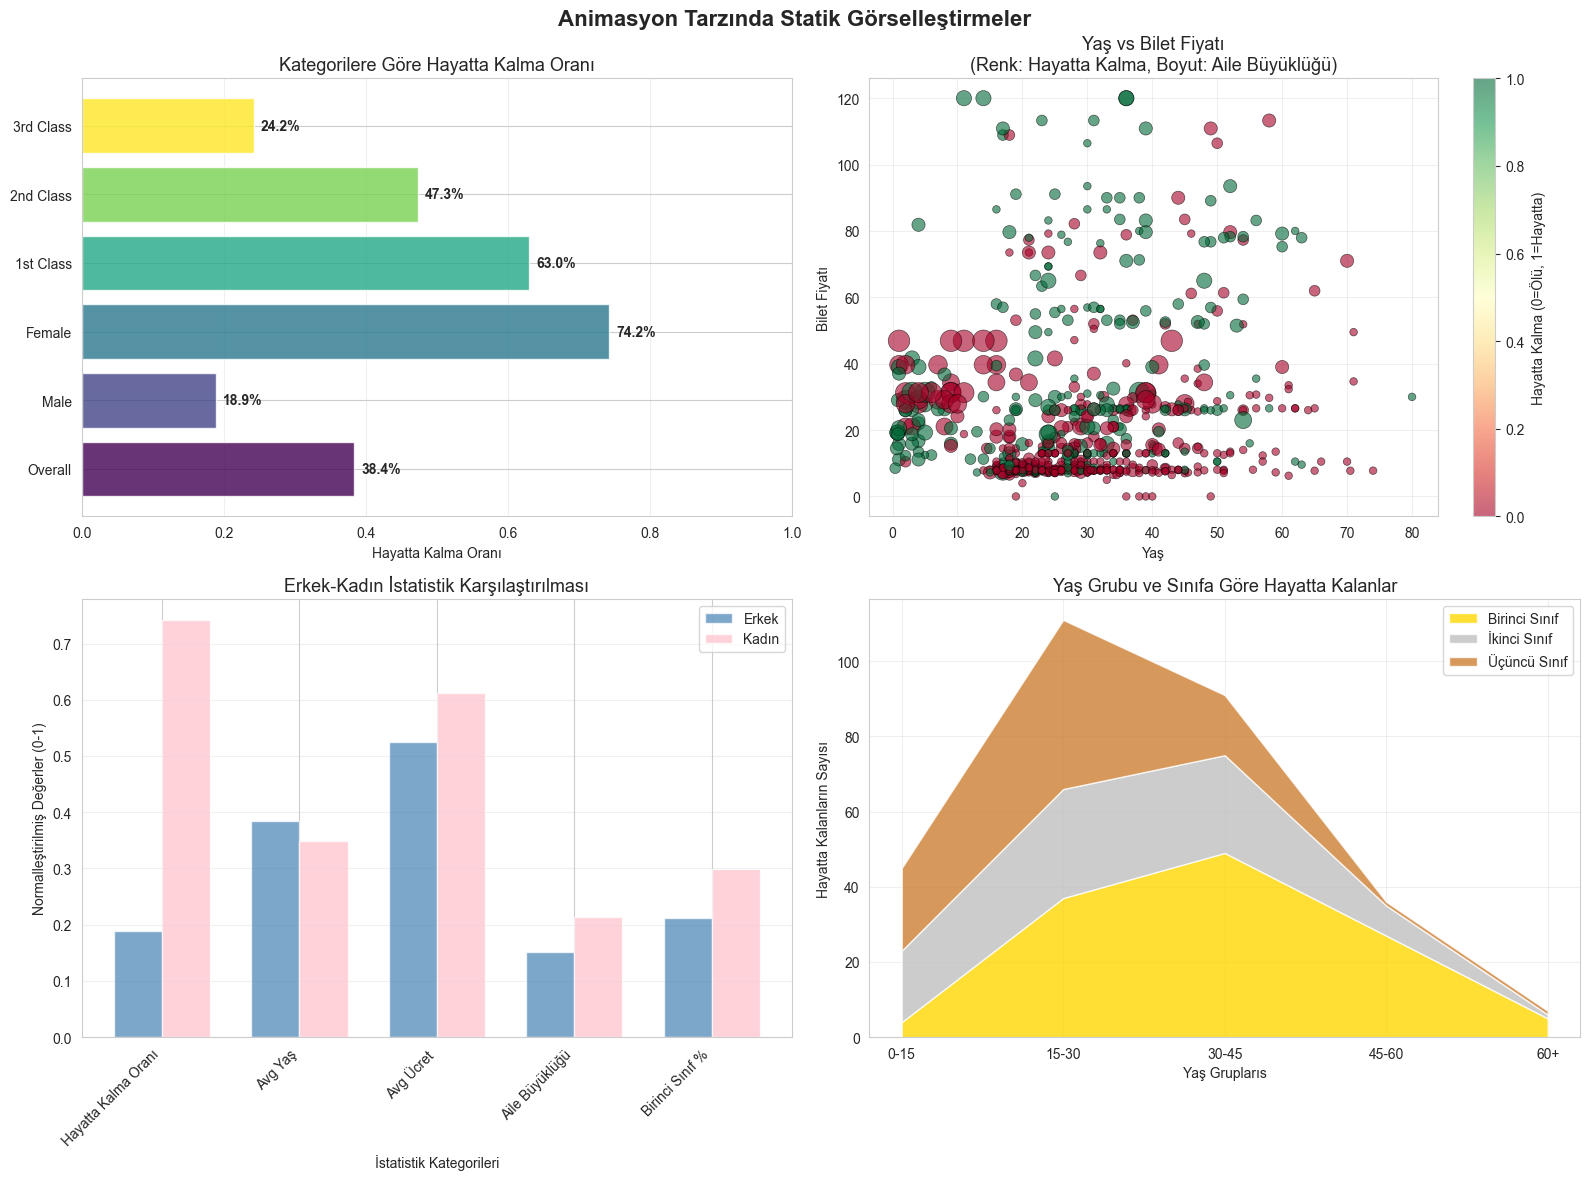

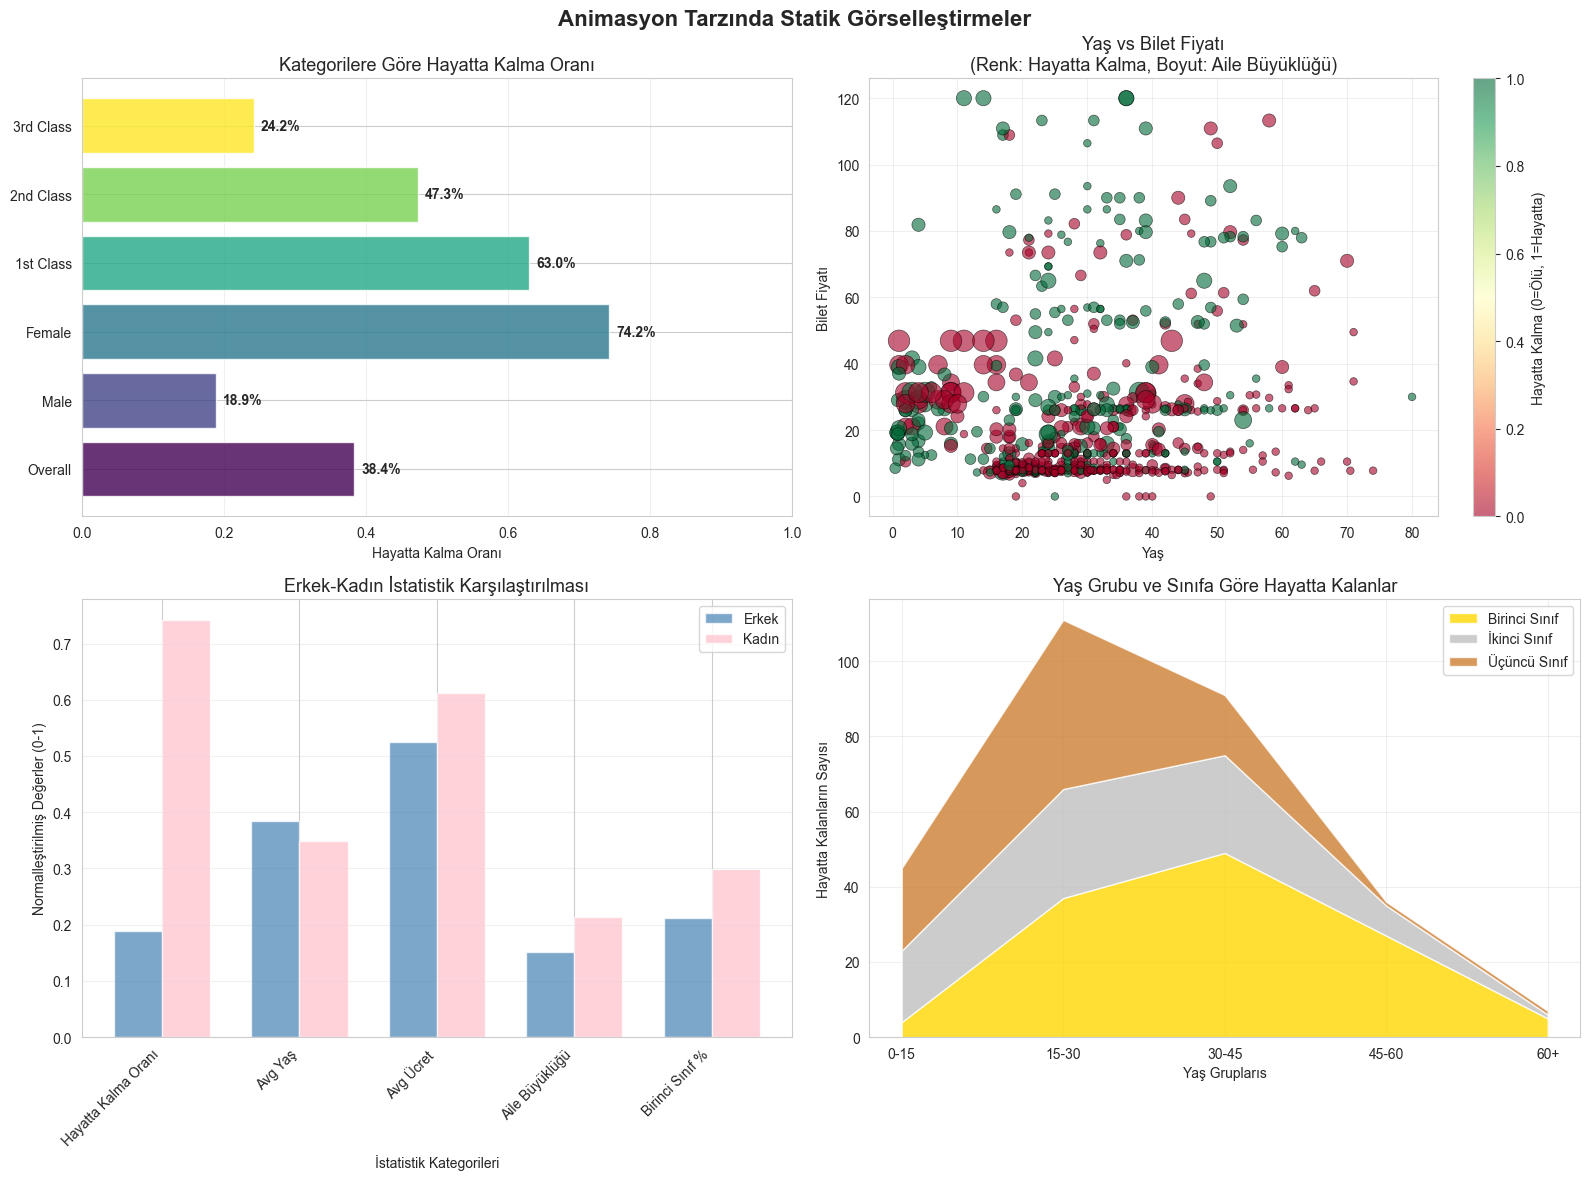

In [106]:
create_animated_style_plot(df)

In [107]:
def optimized_plotting_techniques():
    """
    Büyük veri setleri için optimize edilmiş görselleştirme teknikleri
    """
    # Performans İpuçları:
    # 1. Büyük veri setlerinde sampling kullanın
    # 2. Gereksiz hesaplamaları önlemek için veriyi önceden hazırlayın
    # 3. Subplot'ları verimli kullanın
    # 4. Memory-efficient color mapping kullanın
    
    # Demonstrate with a large synthetic dataset
    np.random.seed(42)
    large_data_size = 50000
    
    print(f"\n {large_data_size:,} kayıtlık büyük veri seti simülasyonu.")
    
    # Büyük bir yapay veri kümesiyle gösterme - Create synthetic large dataset
    large_df = pd.DataFrame({
        'age': np.random.normal(30, 12, large_data_size),
        'fare': np.random.lognormal(3, 1, large_data_size),
        'survived': np.random.binomial(1, 0.4, large_data_size),
        'class': np.random.choice(['First', 'Second', 'Third'], large_data_size, p=[0.2, 0.3, 0.5])
    })
    
    # Yaşı makul sınırlar içinde kırpma Clip age to reasonable bounds
    large_df['age'] = large_df['age'].clip(0, 100)
    
    # Optimizasyon karşılaştırması 
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Performans Optimizasyon Teknikleri', fontsize=14, fontweight='bold') # Performance Optimization Techniques
    
    # 1. Büyük veri kümeleri için örnekleme - Sampling for large datasets
    ax1 = axes[0, 0]
    
    # Tüm veriyi çizmek yerine 1000 nokta örnekleme - Sample 1000 points instead of plotting all 50000
    sample_size = 1000
    sampled_data = large_df.sample(n=sample_size, random_state=42)
    # n --> Verilen sayı kadar rastgele örnek (satır) seçer. Biz de sample_size kadar seçecek
    # random_state=42 --> Rastgelelik için sabit bir (seed) belirler. Sonuçlar tekrarlanabilir olur.
    # Her çalıştırmada aynı örneklerin seçilmesini sağlar (deneylerin tutarlılığı için önemli)
    
    ax1.scatter(sampled_data['age'], sampled_data['fare'], 
               c=sampled_data['survived'], alpha=0.6, s=20, cmap='viridis')
    ax1.set_xlabel('Yaş') # Age
    ax1.set_ylabel('Bilet Ücreti') # Fare
    ax1.set_title(f'Optimize Edildi: Örnek ({sample_size:,} nokta)')
    ax1.grid(True, alpha=0.3)
    


    # 2. Yoğunluk görselleştirmesi için altıgen grafik - Hexbin for density visualization
    ax2 = axes[0, 1]
    
    # Büyük veri setlerinde daha iyi performans için Altıgen (hexbin) kullanımı - Use hexbin for better performance with large datasets
    hb = ax2.hexbin(large_df['age'], large_df['fare'], gridsize=30, cmap='Blues', mincnt=1)
    ax2.set_xlabel('Yaş')
    ax2.set_ylabel('Bilet Ücreti')
    ax2.set_title('Hexbin Yoğunluk Grafiği (Tüm Veri)') # Hexbin Density Plot (All Data)
    plt.colorbar(hb, ax=ax2, label='Sayı')
    



    # 3. Verimli Histogram - Efficient histogram
    ax3 = axes[1, 0]
    
    # Verimlilik için bins önceden hesaplama - Pre-calculate bins for efficiency
    bins = np.linspace(large_df['age'].min(), large_df['age'].max(), 50)
    
    for survival in [0, 1]:
        subset = large_df[large_df['survived'] == survival]['age']
        label = 'Ölü' if survival == 0 else 'Hayatta'
        ax3.hist(subset, bins=bins, alpha=0.7, label=label, density=True)
    
    ax3.set_xlabel('Yaş') # Age
    ax3.set_ylabel('Yoğunluk') # Density
    ax3.set_title('Verimli Histogram (Önceden Hesaplanmış Bins)') # Efficient Histogram (Pre-calculated bins)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    


    # 4. Toplu Görselleştirme - Aggregated visualization
    ax4 = axes[1, 1]
    
    # Daha iyi performans için verileri önceden birleştirme - Pre-aggregate data for better performance
    age_bins = pd.cut(large_df['age'], bins=10)
    aggregated = large_df.groupby([age_bins, 'class'])['survived'].mean().unstack()
    
    aggregated.plot(kind='bar', ax=ax4, width=0.8, 
                   color=['gold', 'silver', '#CD7F32'])
    ax4.set_xlabel('Yaş Grupları') # Age Groups
    ax4.set_ylabel('Hayatta Kalma Oranı') # Survival Rate
    ax4.set_title('Toplu Veri Görselleştirmesi') # Aggregated Data Visualization
    ax4.legend(["Birinci Sınıf", "İkinci Sınıf", "Üçüncü Sınıf"]) # Class --> legend( title = "Class") da yazabilirdik.
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Performans optimizasyonları bitti


 50,000 kayıtlık büyük veri seti simülasyonu.


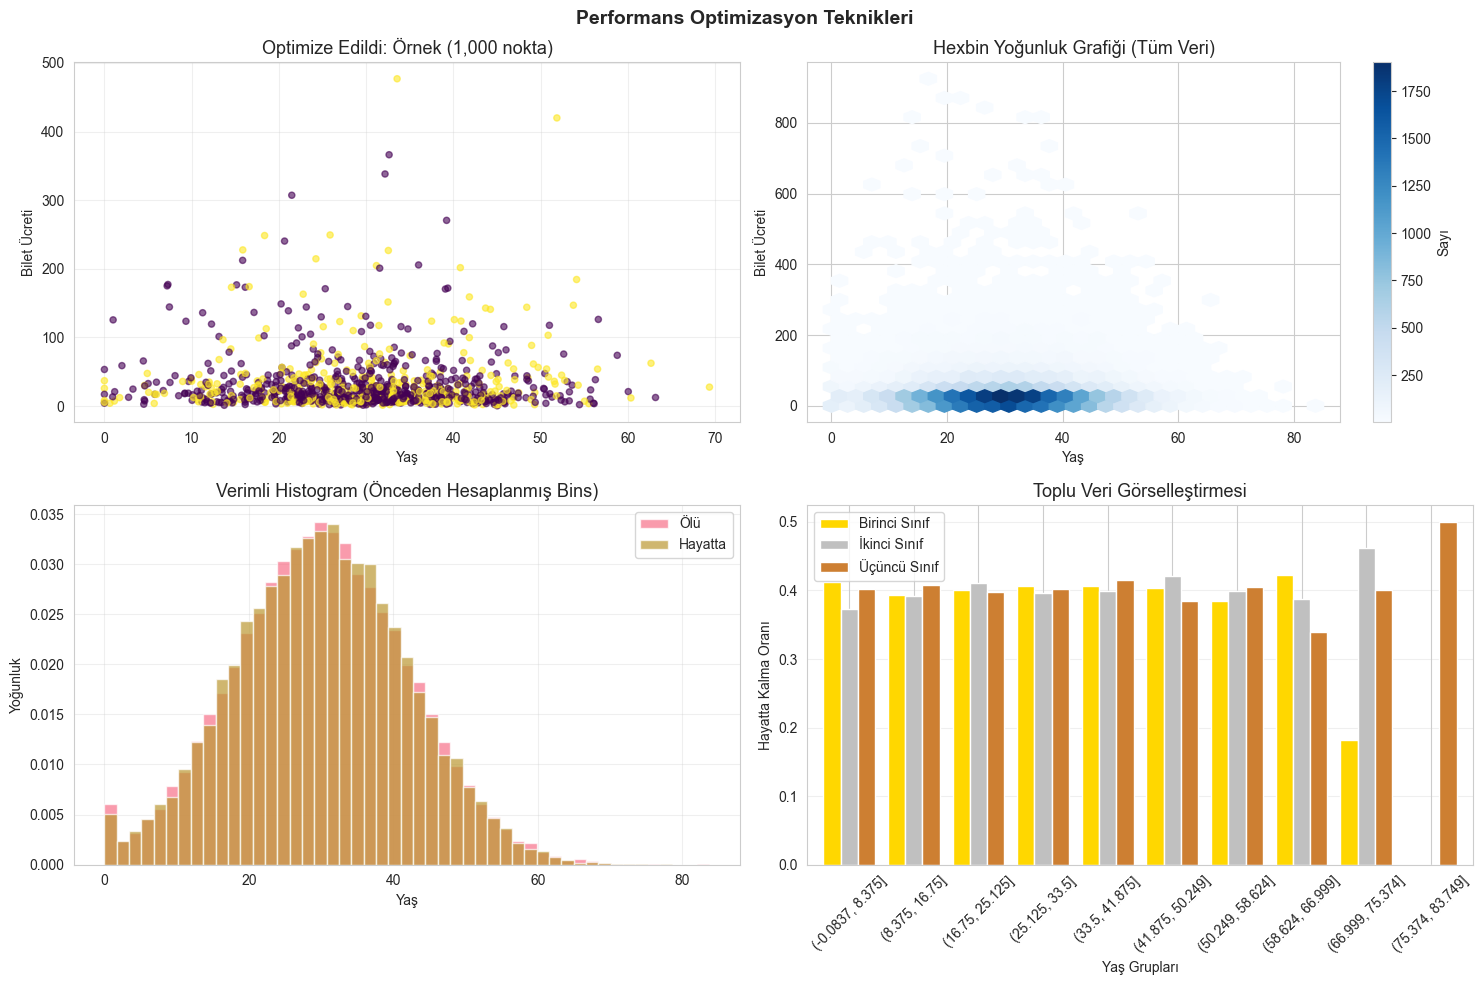

In [108]:
optimized_plotting_techniques()